**Description:** We want to use different ML (supervised and unsupervised) approaches to predict churns of subscriptions of the german newspaper “Die Zeit”. Supervised ML methods can be used to predict (classification methods) subscription churns based on the given dataset. Since a large number of features exists, feature selection as part of an extensive EDA is essential. Unsupervised ML methods could be used first to do clustering on the dataset to identify if there are certain “groups of subscribers”, who share certain features. This clustering could be used to investigate subscriber group specific churn mitigation methods (not only writing emails, as given in the dataset description).

**Project Name:** Churn Prediction - Die Zeit

**Team:** Carlotta Ulm, Silas Mederer, Jonas Bechthold

**Date:** 2020-10-26 to 2020-11-27

# Setting up environment and imports

In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import math
import itertools
from time import time

# own modules
import eda_methods as eda

# visualization
import seaborn as sns
#sns.set(style="white")  
sns.set_theme()

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from pandas.plotting import scatter_matrix

# pandas profiling
from pandas_profiling import ProfileReport

# warnings handler
import warnings
warnings.filterwarnings("ignore")

random_state = 100           # Ensures modeling results can be replicated
np.random.seed(42)

# Display Options for pandas
pd.set_option('display.max_columns', None) # Sets maximum columns displayed in tables
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# Variables for plot sizes
matplotlib.rc('font', size=20)          # controls default text sizes
matplotlib.rc('axes', titlesize=16)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=18)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=18)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=18)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=14)    # legend fontsize
matplotlib.rc('figure', titlesize=20)

####################################################
# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, accuracy_score, f1_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#geodaten
import geopandas as gpd

#time series
import datetime

# Business Understanding 

Please check the [wiki page: Business understanding (publishing and news)](https://github.com/jb-ds2020/nf-ds3-capstone-churn-prevention/wiki/Business-understanding-(publishing-and-news)).

## General

## Background


## Key Questions

## Dataset Description

Let's get an idea about the columns and find out what they mean:

In [4]:
df = pd.read_csv('data/f_chtr_churn_traintable_nf.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161760 entries, 0 to 161759
Columns: 170 entries, Unnamed: 0 to date_x
dtypes: float64(31), int64(121), object(18)
memory usage: 209.8+ MB


In [5]:
df.head()

Unnamed: 0                        auftrag_new_id liefer_beginn_evt  \
0  0           8F55996E-22DD-4450-808F-9F2410C65F0C  2018-08-29         
1  1           FDC16301-8457-4FCE-A630-172D027B4FA6  2018-08-29         
2  2           1B81B3D5-5D6A-4AE7-9AF2-DB5BE537CD90  2018-10-31         
3  3           CF5D1C66-D1B5-454E-B3AD-541792B56EBF  2018-08-01         
4  4           0CE98B1B-1167-4967-B68C-559AEBA1001B  2018-08-29         

              kanal   objekt_name     aboform_name zahlung_rhythmus_name  \
0  E-Mailing         ZEIT Digital  Negative Option  vierteljährlich        
1  andere            ZEIT Digital  Negative Option  halbjährlich           
2  Telefonmarketing  DIE ZEIT      Festabo          vierteljährlich        
3  andere            ZEIT Digital  Festabo          vierteljährlich        
4  andere            ZEIT Digital  Negative Option  halbjährlich           

   lesedauer  rechnungsmonat zahlung_weg_name  studentenabo plz_1 plz_2 plz_3  \
0  19         0               Bankeinzug       0             3     37    372    
1  21         0               Rechnung         0             4     45    451    
2  17         0               Bankeinzug       0             4     40    406    
3  17         0               Bankeinzug       0             8     82    825    
4  11         0               Rechnung         0             7     70    701    

              ort  metropole land_iso_code  shop_kauf  unterbrechung anrede  \
0  Neu-Eichenberg  0          DE            0          0              Herr    
1  Essen           1          DE            0          0              Herr    
2  Düsseldorf      1          DE            2          1              Frau    
3  Münsing         0          DE            0          0              Frau    
4  Stuttgart       1          DE            0          0              Frau    

        titel  avg_churn  zon_che_opt_in  zon_sit_opt_in  zon_zp_grey  \
0  kein Titel  0.412416   0               0               0             
1  kein Titel  0.373177   0               0               0             
2  kein Titel  0.472616   0               0               1             
3  kein Titel  0.472616   0               0               0             
4  kein Titel  0.534802   0               0               0             

   zon_premium  zon_boa  zon_kommentar  zon_sonstige  zon_zp_red  zon_rawr  \
0  1            0        0              0             0           0          
1  0            0        0              0             1           0          
2  0            0        0              0             0           0          
3  1            0        0              0             0           0          
4  1            0        0              0             0           0          

   zon_community  zon_app_sonstige  zon_schach  zon_blog_kommentare  zon_quiz  \
0  0              0                 0           0                    0          
1  0              0                 0           0                    0          
2  0              0                 0           0                    0          
3  0              0                 0           0                    0          
4  0              0                 0           0                    0          

   cnt_abo  cnt_abo_diezeit  cnt_abo_diezeit_digital  cnt_abo_magazin  \
0  2        2                0                        0                 
1  0        0                0                        0                 
2  1        1                0                        0                 
3  7        3                1                        3                 
4  0        0                0                        0                 

   cnt_umwandlungsstatus2_dkey abo_registrierung_min  nl_zeitbrief  \
0  2                            2015-03-12 12:33:54   0              
1  0                            2018-07-30 03:32:59   2              
2  1                            1986-07-01 12:00:00   0              
3  3                           

In [6]:
df.tail(1)

Unnamed: 0                        auftrag_new_id liefer_beginn_evt  \
161759  161759      8614DABF-1304-4B7A-98CB-33A42F19774E  2018-09-06         

                   kanal objekt_name aboform_name zahlung_rhythmus_name  \
161759  Telefonmarketing  DIE ZEIT    Festabo      vierteljährlich        

        lesedauer  rechnungsmonat zahlung_weg_name  studentenabo plz_1 plz_2  \
161759  12         0               Rechnung         0             6     60     

       plz_3        ort  metropole land_iso_code  shop_kauf  unterbrechung  \
161759  603   Frankfurt  0          DE            0          1               

       anrede       titel  avg_churn  zon_che_opt_in  zon_sit_opt_in  \
161759  Frau   kein Titel  0.565934   0               0                

        zon_zp_grey  zon_premium  zon_boa  zon_kommentar  zon_sonstige  \
161759  2            0            0        0              0              

        zon_zp_red  zon_rawr  zon_community  zon_app_sonstige  zon_schach  \
161759  0           0         0              0                 0            

        zon_blog_kommentare  zon_quiz  cnt_abo  cnt_abo_diezeit  \
161759  0                    0         5        5                 

        cnt_abo_diezeit_digital  cnt_abo_magazin  cnt_umwandlungsstatus2_dkey  \
161759  0                        0                1                             

       abo_registrierung_min  nl_zeitbrief  nl_zeitshop  \
161759  2014-05-19 16:53:35   1             0             

        nl_zeitverlag_hamburg  nl_fdz_organisch  nl_blacklist_sum  \
161759  0                      0                 0                  

        nl_bounced_sum  nl_aktivitaet nl_registrierung_min  nl_sperrliste_sum  \
161759  0               7              2011-03-29 12:42:54  0                   

        nl_opt_in_sum  boa_reg  che_reg  sit_reg  sso_reg  received_anzahl_1w  \
161759  1              0        0        0        1        0                    

        received_anzahl_1m  received_anzahl_3m  received_anzahl_6m  \
161759  0                   0                   0                    

        opened_anzahl_1w  opened_anzahl_1m  opened_anzahl_3m  openedanzahl_6m  \
161759  0                 0                 0                 0                 

        clicked_anzahl_1w  clicked_anzahl_1m  clicked_anzahl_3m  \
161759  0                  0                  0                   

        clicked_anzahl_6m  unsubscribed_anzahl_1w  unsubscribed_anzahl_1m  \
161759  0                  0                       0                        

        unsubscribed_anzahl_3m  unsubscribed_anzahl_6m  openrate_1w  \
161759  0                       0                       0.0           

        clickrate_1w  openrate_1m  clickrate_1m  openrate_3m  clickrate_3m  \
161759  0.0           0.0          0.0           0.0          0.0            

        received_anzahl_bestandskunden_1w  received_anzahl_bestandskunden_1m  \
161759  0                                  0                                   

        received_anzahl_bestandskunden_3m  received_anzahl_bestandskunden_6m  \
161759  0                                  0                                   

        opened_anzahl_bestandskunden_1w  opened_anzahl_bestandskunden_1m  \
161759  0                                0                                 

        opened_anzahl_bestandskunden_3m  openedanzahl_bestandskunden_6m  \
161759  0                                0                                

        clicked_anzahl_bestandskunden_1w  clicked_anzahl_bestandskunden_1m  \
161759  0                                 0                                  

        clicked_anzahl_bestandskunden_3m  clicked_anzahl_bestandskunden_6m  \
161759  0                                 0                                  

        unsubscribed_anzahl_bestandskunden_1w  \
161759  0                                       

        unsubscribed_anzahl_bestandskunden_1m  \
161759  0                                       

        unsubscribe

In [7]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [8]:
columnlist = list(df.columns) 
columnlist

['auftrag_new_id',
 'liefer_beginn_evt',
 'kanal',
 'objekt_name',
 'aboform_name',
 'zahlung_rhythmus_name',
 'lesedauer',
 'rechnungsmonat',
 'zahlung_weg_name',
 'studentenabo',
 'plz_1',
 'plz_2',
 'plz_3',
 'ort',
 'metropole',
 'land_iso_code',
 'shop_kauf',
 'unterbrechung',
 'anrede',
 'titel',
 'avg_churn',
 'zon_che_opt_in',
 'zon_sit_opt_in',
 'zon_zp_grey',
 'zon_premium',
 'zon_boa',
 'zon_kommentar',
 'zon_sonstige',
 'zon_zp_red',
 'zon_rawr',
 'zon_community',
 'zon_app_sonstige',
 'zon_schach',
 'zon_blog_kommentare',
 'zon_quiz',
 'cnt_abo',
 'cnt_abo_diezeit',
 'cnt_abo_diezeit_digital',
 'cnt_abo_magazin',
 'cnt_umwandlungsstatus2_dkey',
 'abo_registrierung_min',
 'nl_zeitbrief',
 'nl_zeitshop',
 'nl_zeitverlag_hamburg',
 'nl_fdz_organisch',
 'nl_blacklist_sum',
 'nl_bounced_sum',
 'nl_aktivitaet',
 'nl_registrierung_min',
 'nl_sperrliste_sum',
 'nl_opt_in_sum',
 'boa_reg',
 'che_reg',
 'sit_reg',
 'sso_reg',
 'received_anzahl_1w',
 'received_anzahl_1m',
 'received_

In [9]:
eda.describe_plus(df).round(2)

count   mean     std  min    25%  \
lesedauer                              161760.0  31.50  21.43   0.0  13.00   
rechnungsmonat                         161760.0  0.10   0.30    0.0  0.00    
studentenabo                           161760.0  0.11   0.31    0.0  0.00    
metropole                              161760.0  0.29   0.45    0.0  0.00    
shop_kauf                              161760.0  0.46   2.21    0.0  0.00    
unterbrechung                          161760.0  0.10   0.30    0.0  0.00    
avg_churn                              161760.0  0.32   0.15    0.1  0.19    
zon_che_opt_in                         161760.0  0.00   0.05    0.0  0.00    
zon_sit_opt_in                         161760.0  0.00   0.03    0.0  0.00    
zon_zp_grey                            161760.0  0.16   0.46    0.0  0.00    
zon_premium                            161760.0  0.16   0.46    0.0  0.00    
zon_boa                                161760.0  0.01   0.10    0.0  0.00    
zon_kommentar                          161760.0  0.00   0.07    0.0  0.00    
zon_sonstige                           161760.0  0.05   0.26    0.0  0.00    
zon_zp_red                             161760.0  0.04   0.25    0.0  0.00    
zon_rawr                               161760.0  0.00   0.02    0.0  0.00    
zon_community                          161760.0  0.00   0.01    0.0  0.00    
zon_app_sonstige                       161760.0  0.00   0.06    0.0  0.00    
zon_schach                             161760.0  0.00   0.02    0.0  0.00    
zon_blog_kommentare                    161760.0  0.00   0.03    0.0  0.00    
zon_quiz                               161760.0  0.00   0.02    0.0  0.00    
cnt_abo                                161760.0  7.11   166.69  0.0  0.00    
cnt_abo_diezeit                        161760.0  4.63   96.44   0.0  0.00    
cnt_abo_diezeit_digital                161760.0  0.50   11.09   0.0  0.00    
cnt_abo_magazin                        161760.0  0.59   10.63   0.0  0.00    
cnt_umwandlungsstatus2_dkey            161760.0  2.76   71.74   0.0  0.00    
nl_zeitbrief                           161760.0  1.37   0.88    0.0  0.00    
nl_zeitshop                            161760.0  0.29   0.67    0.0  0.00    
nl_zeitverlag_hamburg                  161760.0  0.12   0.45    0.0  0.00    
nl_fdz_organisch                       161760.0  0.00   0.02    0.0  0.00    
nl_blacklist_sum                       161760.0  0.05   0.44    0.0  0.00    
nl_bounced_sum                         161760.0  0.13   0.60    0.0  0.00    
nl_aktivitaet                          161760.0  6.65   4.36    0.0  4.00    
nl_sperrliste_sum                      161760.0  0.08   1.48    0.0  0.00    
nl_opt_in_sum                          161760.0  0.27   0.62    0.0  0.00    
boa_reg                                161760.0  0.07   0.26    0.0  0.00    
che_reg                                161760.0  0.09   0.28    0.0  0.00    
sit_reg                                161760.0  0.07   0.26    0.0  0.00    
sso_reg                                161760.0  0.68   0.47    0.0  0.00    
received_anzahl_1w                     161760.0  1.86   3.70    0.0  0.00    
received_anzahl_1m                     161760.0  7.15   13.90   0.0  0.00    
received_anzahl_3m                     161760.0  20.44  38.84   0.0  0.00    
received_anzahl_6m                     161760.0  40.40  75.53   0.0  0.00    
opened_anzahl_1w                       161760.0  0.61   2.07    0.0  0.00    
opened_anzahl_1m                       161760.0  2.30   7.29    0.0  0.00    
opened_anzahl_3m                       161760.0  6.47   19.97   0.0  0.00    
openedanzahl_6m                        161760.0  12.59  38.36   0.0  0.00    
clicked_anzahl_1w                      161760.0  0.06   0.38    0.0  0.00    
clicked_anzahl_1m                      161760.0  0.23   1.20    0.0  0.00    
clicked_anzahl_3m                      161760.0  0.64   3.04    0.0  0.00    
clicked_anzahl_6m                      161760.0  1.20   5.62    

## Get an idea of the column names by sampling

In [10]:
df.sample(2)

auftrag_new_id liefer_beginn_evt   kanal  \
35384  772EC65E-50E3-49CA-98D8-2003C4DE5DF7  2018-08-16        andere   
62036  0C9FF4A4-E98C-4450-B5F4-7FC04CCA88AB  2013-02-21        andere   

        objekt_name aboform_name zahlung_rhythmus_name  lesedauer  \
35384  DIE ZEIT      Festabo      jährlich              21          
62036  ZEIT Digital  Festabo      jährlich              78          

       rechnungsmonat zahlung_weg_name  studentenabo plz_1 plz_2 plz_3  \
35384  0               Bankeinzug       1             1     10    105    
62036  0               Kreditkarte      0             7     70    701    

             ort  metropole land_iso_code  shop_kauf  unterbrechung anrede  \
35384  Berlin     1          DE            0          0              Herr    
62036  Stuttgart  1          DE            0          0              Herr    

            titel  avg_churn  zon_che_opt_in  zon_sit_opt_in  zon_zp_grey  \
35384  kein Titel  0.282302   0               0               0             
62036  kein Titel  0.114840   0               0               0             

       zon_premium  zon_boa  zon_kommentar  zon_sonstige  zon_zp_red  \
35384  0            0        0              0             0            
62036  0            0        0              0             0            

       zon_rawr  zon_community  zon_app_sonstige  zon_schach  \
35384  0         0              0                 0            
62036  0         0              0                 0            

       zon_blog_kommentare  zon_quiz  cnt_abo  cnt_abo_diezeit  \
35384  0                    0         4        2                 
62036  0                    0         6        3                 

       cnt_abo_diezeit_digital  cnt_abo_magazin  cnt_umwandlungsstatus2_dkey  \
35384  1                        1                2                             
62036  0                        1                1                             

      abo_registrierung_min  nl_zeitbrief  nl_zeitshop  nl_zeitverlag_hamburg  \
35384  2016-12-21 09:09:21   2             0            0                       
62036  2003-07-17 15:14:57   2             0            0                       

       nl_fdz_organisch  nl_blacklist_sum  nl_bounced_sum  nl_aktivitaet  \
35384  0                 0                 0               13              
62036  0                 1                 0               11              

      nl_registrierung_min  nl_sperrliste_sum  nl_opt_in_sum  boa_reg  \
35384  2016-12-20 07:38:02  0                  0              0         
62036  2008-01-26 20:04:41  0                  1              0         

       che_reg  sit_reg  sso_reg  received_anzahl_1w  received_anzahl_1m  \
35384  0        0        1        0                   0                    
62036  0        0        1        0                   0                    

       received_anzahl_3m  received_anzahl_6m  opened_anzahl_1w  \
35384  0                   0                   0                  
62036  0                   0                   0                  

       opened_anzahl_1m  opened_anzahl_3m  openedanzahl_6m  clicked_anzahl_1w  \
35384  0                 0                 0                0                   
62036  0                 0                 0                0                   

       clicked_anzahl_1m  clicked_anzahl_3m  clicked_anzahl_6m  \
35384  0                  0                  0                   
62036  0                  0                  0                   

       unsubscribed_anzahl_1w  unsubscribed_anzahl_1m  unsubscribed_anzahl_3m  \
35384  0                       0                       0                        
62036  0                       0                       0                        

       unsubscribed_anzahl_6m  openrate_1w  clickrate_1w  openrate_1m  \
35384  0                       0.0          0.0           0.0           
62036  0                       0.0          0.0           0.0           

       clickrate_1m  openrate_

## Dataset Overview with pandas profiling

In [11]:
# use pandas_profiling to create report
# save html to plots

# profile = ProfileReport(df)
# profile.to_file("plots/report.html")

In [12]:
from IPython.display import IFrame
IFrame(src='plots/pandas_profiling_report.html', width=1000, height=700)

## Target Metric


In [13]:
#df.churn.value_counts()

In [14]:
#df2 = pd.read_csv('data/f_chtr_churn_traintable_nf_2.csv')
#df2.info()

In [15]:
#df2.sample(2)

In [16]:
#df2.drop("Unnamed: 0", axis=1, inplace=True)

In [17]:
#df2.churn.value_counts()

In [18]:
#df2.email_am_kunden.value_counts()

In [19]:
#columnlist2 = list(df2.columns) 

In [20]:
#for item in columnlist2:
#    #print(item)
#    if item not in columnlist:
#        print('not in list')
#        print(item)

## Business Scenario

# Data Mining

# Data Cleaning
Purpose: Fix the inconsistencies within the data and handle the missing values

In [21]:
eda.meta(df).T

nulls percent    dtype    dup nuniques
varname                                                                       
kuendigungs_eingangs_datum             111691  69.05   object   True   349    
ort                                    88      0.05    object   True   11492  
auftrag_new_id                         0       0       object   False  161760 
openrate_produktnews_1w                0       0       float64  True   11     
clicked_anzahl_produktnews_1m          0       0       int64    True   6      
clicked_anzahl_produktnews_3m          0       0       int64    True   7      
clicked_anzahl_produktnews_6m          0       0       int64    True   7      
unsubscribed_anzahl_produktnews_1w     0       0       int64    True   2      
unsubscribed_anzahl_produktnews_1m     0       0       int64    True   2      
unsubscribed_anzahl_produktnews_3m     0       0       int64    True   2      
unsubscribed_anzahl_produktnews_6m     0       0       int64    True   2      
clickrate_produktnews_1w               0       0       float64  True   7      
openedanzahl_produktnews_6m            0       0       int64    True   12     
openrate_produktnews_1m                0       0       float64  True   24     
clickrate_produktnews_1m               0       0       float64  True   19     
openrate_produktnews_3m                0       0       float64  True   26     
clickrate_produktnews_3m               0       0       float64  True   21     
received_anzahl_hamburg_1w             0       0       int64    True   9      
received_anzahl_hamburg_1m             0       0       int64    True   28     
received_anzahl_hamburg_3m             0       0       int64    True   59     
received_anzahl_hamburg_6m             0       0       int64    True   107    
clicked_anzahl_produktnews_1w          0       0       int64    True   4      
opened_anzahl_produktnews_1m           0       0       int64    True   9      
opened_anzahl_produktnews_3m           0       0       int64    True   11     
opened_anzahl_hamburg_1m               0       0       int64    True   33     
clicked_anzahl_bestandskunden_3m       0       0       int64    True   3      
clicked_anzahl_bestandskunden_6m       0       0       int64    True   4      
unsubscribed_anzahl_bestandskunden_1w  0       0       int64    True   2      
unsubscribed_anzahl_bestandskunden_1m  0       0       int64    True   2      
unsubscribed_anzahl_bestandskunden_3m  0       0       int64    True   2      
unsubscribed_anzahl_bestandskunden_6m  0       0       int64    True   2      
openrate_bestandskunden_1w             0       0       float64  True   2      
clickrate_bestandskunden_1w            0       0       float64  True   2      
openrate_bestandskunden_1m             0       0       float64  True   4      
clickrate_bestandskunden_1m            0       0       float64  True   3      
openrate_bestandskunden_3m             0       0       float64  True   8      
clickrate_bestandskunden_3m            0       0       float64  True   5      
received_anzahl_produktnews_1w         0       0       int64    True   5      
received_anzahl_produktnews_1m         0       0       int64    True   10     
received_anzahl_produktnews_3m         0       0       int64    True   11     
received_anzahl_produktnews_6m         0       0       int64    True   15     
opened_anzahl_produktnews_1w           0       0       int64    True   5      
opened_anzahl_hamburg_1w               0       0       int64    True   16     
openedanzahl_hamburg_6m                0       0       int64    True   129    
opened_anzahl_hamburg_3m               0       0       int64    True   74     
opened_anzahl_zeitbrief_1m             0       0       int64    True   17     
openedanzahl_zeitbrief_6m              0       0       int64    True   44     
clicked_anzahl_zeitbrief_1w            0       0       int64    True   4      
clicked_anzahl_zeitbrief_1m            0       0       int64    True   8      
clicked_anz

In [22]:
continues = df.select_dtypes(include=['float64','int64'])
print(f"numeric features {len(continues.columns)}")
categorial = df.select_dtypes(include="object")
print(f"object features  {len(categorial.columns)}")
print(f"shape {df.shape}")

numeric features 151
object features  18
shape (161760, 169)


## Conclusion

**Dataframe in general**
- The data set is complete and contains 161,760 entries and 169 features. There are some features that we will not be able to use. For example the label "churn" or the feature "date_x", "kuendigungs_eingangs_datum" or "avg_churn" which probably contains the values from the current churn-prediction-model.

**Missings**
- There are only two features with missing values. The feature "kuendigungs_eingangs_datum" is null if there is no notice of termination, so these nulls are correct. The other feature is "ort", we are able to engineer the "ort" by using the feature "plz_3".

**Dublicates**
- The feature "auftrag_new_id" is the only one with no dublicates. We will drop this, cause all these entries are unique given by the stakeholder to manage the contracts.

**Data types**
- There are 151 numeric features, a lot of them will be categorial. Also we have 18 object types.

## Restrict the number of subscription (cnt_abo) to small household to exclude major customers

# Data Exploration - EDA


In [23]:
def crosstab_evaluation(feature_column,target_column,relative=True):
    '''function to cross evaluate two features by a pandas cross table
    Inputs:
    feature_column: pandas Series of feature
    target_column: pandas Series of target (y-axis value)
    relative: False -> returns absolute values, True -> gives percentages
    
    Retunr:
    crosstable
    '''
    crosstable = pd.crosstab(feature_column,target_column)
    if relative:
        crosstable = crosstable.div(crosstable.sum(1),axis=0)
    
    return crosstable

def crosstab_barplot(crosstable,labellist,figsize_x=10,figsize_y=7,xlabelname='Default'):
    '''
    Function to plot a pandas crosstable. 
    
    Inputs:
    crosstable: a pandas crosstable
    labellist: a list with the labels of the data
    xlabelname: Name of the x axis feature
    '''
    crosstable.plot(kind='bar', stacked=True,figsize=(figsize_x,figsize_y))
    plt.xlabel(xlabelname)
    plt.ylabel('Frequency')
    
    #plt.title('Title');
    #plt.xticks(np.arange(2), ('60 months', '36 months',), fontsize=20)
    
    L=plt.legend(fontsize=20,loc=(1.04,0.83))
    L.get_texts()[0].set_text(labellist[0])
    L.get_texts()[1].set_text(labellist[1])

## Describe

In [24]:
eda.describe_plus(df)

count   mean     std  min    25%  \
lesedauer                              161760.0  31.50  21.43   0.0  13.00   
rechnungsmonat                         161760.0  0.10   0.30    0.0  0.00    
studentenabo                           161760.0  0.11   0.31    0.0  0.00    
metropole                              161760.0  0.29   0.45    0.0  0.00    
shop_kauf                              161760.0  0.46   2.21    0.0  0.00    
unterbrechung                          161760.0  0.10   0.30    0.0  0.00    
avg_churn                              161760.0  0.32   0.15    0.1  0.19    
zon_che_opt_in                         161760.0  0.00   0.05    0.0  0.00    
zon_sit_opt_in                         161760.0  0.00   0.03    0.0  0.00    
zon_zp_grey                            161760.0  0.16   0.46    0.0  0.00    
zon_premium                            161760.0  0.16   0.46    0.0  0.00    
zon_boa                                161760.0  0.01   0.10    0.0  0.00    
zon_kommentar                          161760.0  0.00   0.07    0.0  0.00    
zon_sonstige                           161760.0  0.05   0.26    0.0  0.00    
zon_zp_red                             161760.0  0.04   0.25    0.0  0.00    
zon_rawr                               161760.0  0.00   0.02    0.0  0.00    
zon_community                          161760.0  0.00   0.01    0.0  0.00    
zon_app_sonstige                       161760.0  0.00   0.06    0.0  0.00    
zon_schach                             161760.0  0.00   0.02    0.0  0.00    
zon_blog_kommentare                    161760.0  0.00   0.03    0.0  0.00    
zon_quiz                               161760.0  0.00   0.02    0.0  0.00    
cnt_abo                                161760.0  7.11   166.69  0.0  0.00    
cnt_abo_diezeit                        161760.0  4.63   96.44   0.0  0.00    
cnt_abo_diezeit_digital                161760.0  0.50   11.09   0.0  0.00    
cnt_abo_magazin                        161760.0  0.59   10.63   0.0  0.00    
cnt_umwandlungsstatus2_dkey            161760.0  2.76   71.74   0.0  0.00    
nl_zeitbrief                           161760.0  1.37   0.88    0.0  0.00    
nl_zeitshop                            161760.0  0.29   0.67    0.0  0.00    
nl_zeitverlag_hamburg                  161760.0  0.12   0.45    0.0  0.00    
nl_fdz_organisch                       161760.0  0.00   0.02    0.0  0.00    
nl_blacklist_sum                       161760.0  0.05   0.44    0.0  0.00    
nl_bounced_sum                         161760.0  0.13   0.60    0.0  0.00    
nl_aktivitaet                          161760.0  6.65   4.36    0.0  4.00    
nl_sperrliste_sum                      161760.0  0.08   1.48    0.0  0.00    
nl_opt_in_sum                          161760.0  0.27   0.62    0.0  0.00    
boa_reg                                161760.0  0.07   0.26    0.0  0.00    
che_reg                                161760.0  0.09   0.28    0.0  0.00    
sit_reg                                161760.0  0.07   0.26    0.0  0.00    
sso_reg                                161760.0  0.68   0.47    0.0  0.00    
received_anzahl_1w                     161760.0  1.86   3.70    0.0  0.00    
received_anzahl_1m                     161760.0  7.15   13.90   0.0  0.00    
received_anzahl_3m                     161760.0  20.44  38.84   0.0  0.00    
received_anzahl_6m                     161760.0  40.40  75.53   0.0  0.00    
opened_anzahl_1w                       161760.0  0.61   2.07    0.0  0.00    
opened_anzahl_1m                       161760.0  2.30   7.29    0.0  0.00    
opened_anzahl_3m                       161760.0  6.47   19.97   0.0  0.00    
openedanzahl_6m                        161760.0  12.59  38.36   0.0  0.00    
clicked_anzahl_1w                      161760.0  0.06   0.38    0.0  0.00    
clicked_anzahl_1m                      161760.0  0.23   1.20    0.0  0.00    
clicked_anzahl_3m                      161760.0  0.64   3.04    0.0  0.00    
clicked_anzahl_6m                      161760.0  1.20   5.62    

## Customer/Personal Features - Jonas

The following feature are considered as personal information and shortly described:
- anrede: Mr, Mrs
- titel: academic title
- plz_1: first letter of zip code
- plz_2: first two letters of zip code
- plz_3: first three letters of zip code
- ort: city
- metropole: is the city a metropolitan city
- land_iso_code: DE, A, CH (Germany, Austria, Switzerland)

### Anrede

In [25]:
legendlist = ['churn','no churn']

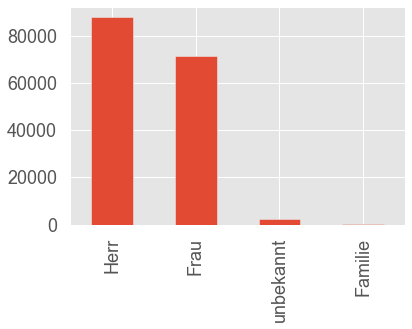

In [26]:
df.anrede.value_counts().plot(kind='bar');

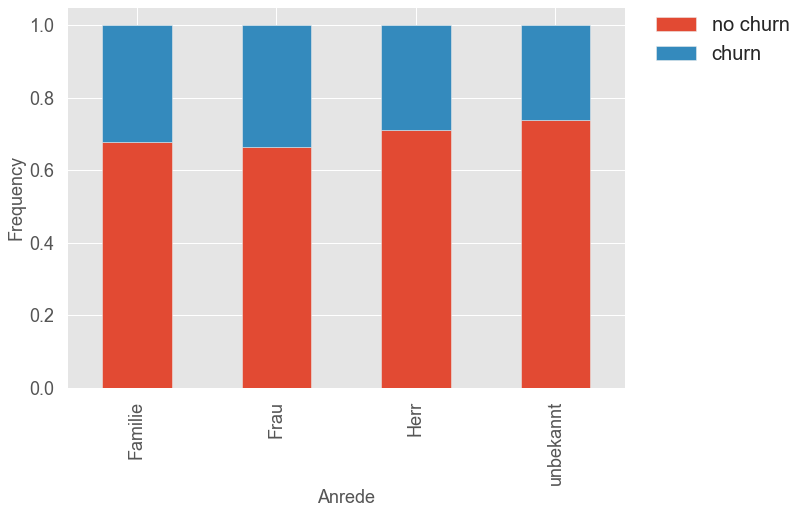

In [27]:
anrede_churn = crosstab_evaluation(df.anrede,df.churn)
crosstab_barplot(anrede_churn,['no churn','churn'],xlabelname='Anrede')

We can observe just small differences in the anrede, unknown and male customers seem to have a slightly higher churn probability. 

### Titel

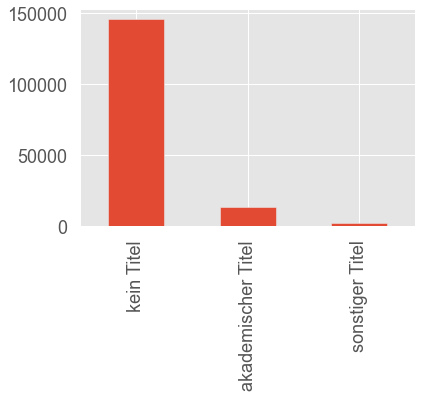

In [28]:
df.titel.value_counts().plot(kind='bar');

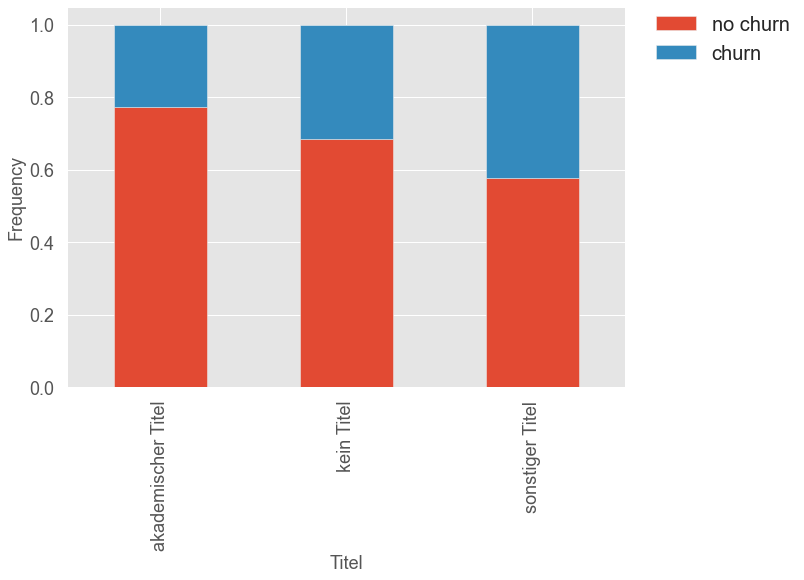

In [29]:
titel_churn = crosstab_evaluation(df.titel,df.churn)
crosstab_barplot(titel_churn,['no churn','churn'],xlabelname='Titel')

We can observer a smaller churn rate for academic titles compared to no title. The column other title (sonstiger Titel) is quite useless because we don't know hat kind of titles are included in there.

### PLZ 1 

Find the missing number of zip codes:

In [30]:
df_zip_xx = df[df.plz_1 == 'xx']
print('Number of missing zip codes entries:',df_zip_xx.shape[0])
print('Percentage of missing zip codes in total:',df_zip_xx.shape[0]/df.shape[0])

Number of missing zip codes entries: 19788
Percentage of missing zip codes in total: 0.12232937685459941


There are 19788 entries with no zip code, which is about 12 percent. 

In [31]:
df_zip_xx.ort.value_counts().nlargest(10)

Wien          3966
Zürich        1359
Basel         580 
Graz          573 
Innsbruck     406 
Salzburg      352 
Bern          347 
Linz          325 
Winterthur    148 
Luzern        134 
Name: ort, dtype: int64

The xx zip codes are all non german cities (e.g. Switzerland), so we could divide the dataset into germany and out of germany areas.

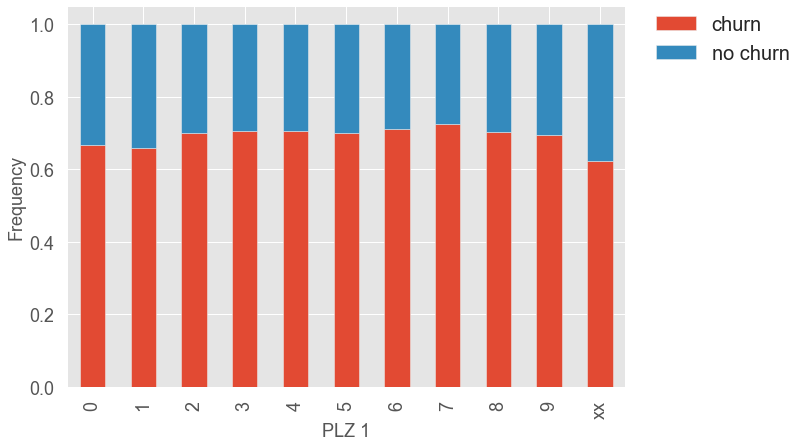

In [32]:
plz1_churn = crosstab_evaluation(df.plz_1,df.churn)
crosstab_barplot(plz1_churn,['churn','no churn'],xlabelname='PLZ 1')

Simplified geographic features, here the first digit of the zip code are quite uselfull indicators for determine regions with higher churn rate. 

### PLZ 2

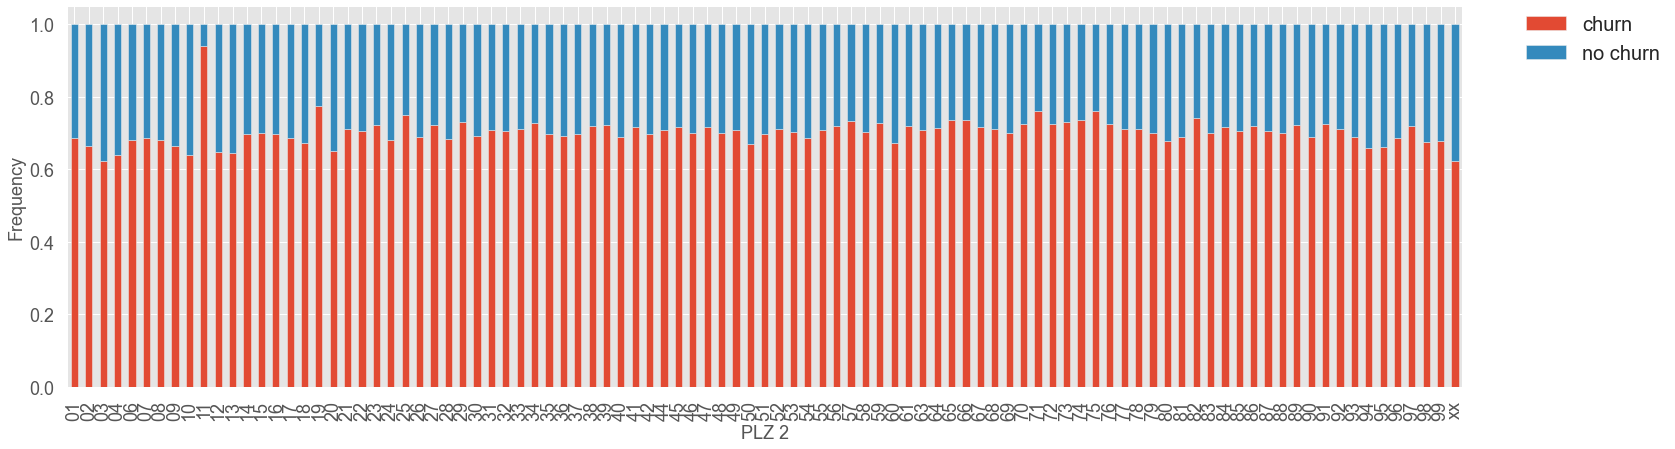

In [33]:
plz2_churn = crosstab_evaluation(df.plz_2,df.churn)
crosstab_barplot(plz2_churn,['churn','no churn'],xlabelname='PLZ 2',figsize_x=25)

Compated to plz_1 we can see more details by this geographic information, the smearing of geographical data is less with two digits and we can have nice insights in the geographical distribution of our churns.

### PLZ 3

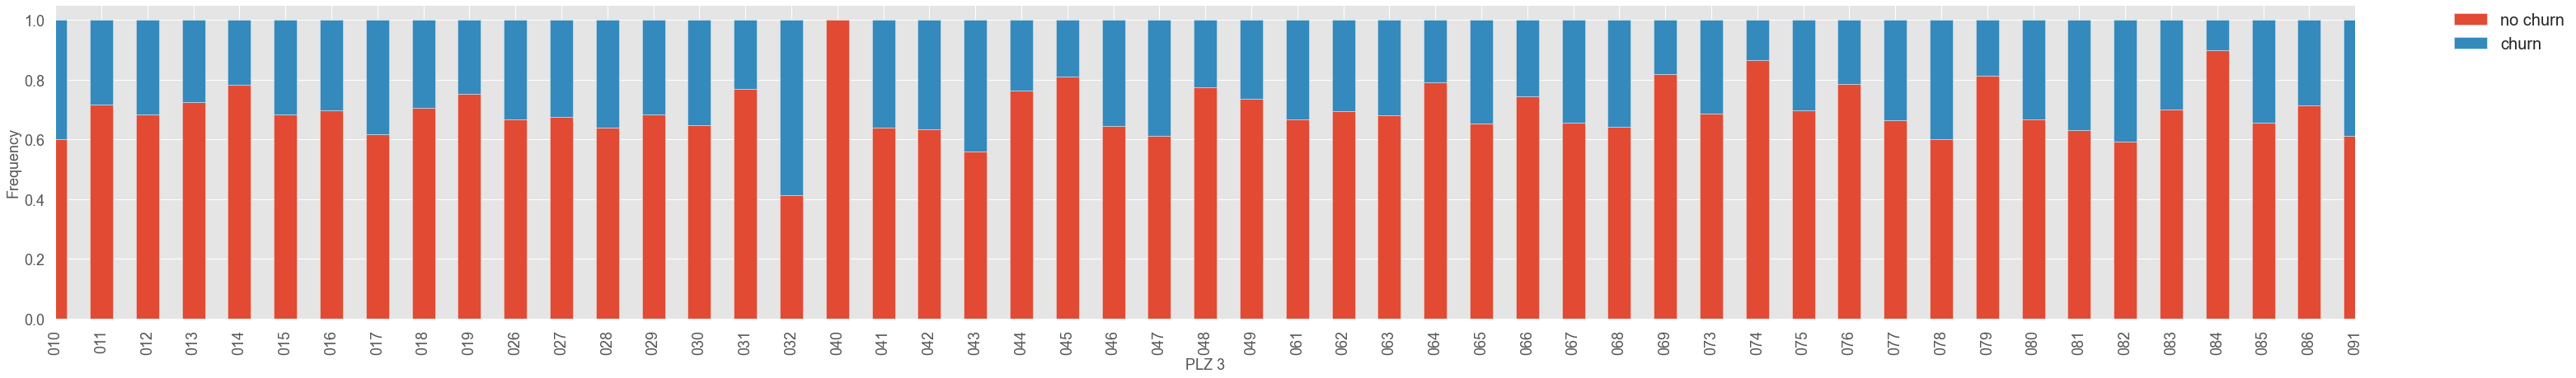

In [232]:
plz3_churn = crosstab_evaluation(df.plz_3,df.churn)
crosstab_barplot(plz3_churn,['no churn','churn'],xlabelname='PLZ 3',figsize_x=50)
plt.xlim(0,50);

By using the 3 digit PLZ we can observe much higher variations in the churn rate. We should definitely include this feature in our model.

Since this feature has a lot of entries, it is usefull to use a nice geographical visualization with geopandas. The link to geopandas for germany can be found here: https://juanitorduz.github.io/germany_plots/

In [36]:
# geodata
plz_shape_df = gpd.read_file('data/plz-gebiete.shp', dtype={'plz': str})

plz_shape_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8706 entries, 0 to 8705
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   plz       8706 non-null   object  
 1   note      8706 non-null   object  
 2   geometry  8706 non-null   geometry
dtypes: geometry(1), object(2)
memory usage: 204.2+ KB


In [37]:
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Cologne': (6.953101, 50.935173),
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'Munich': (11.576124, 48.137154),
    'Dortmund': (7.468554, 51.513400),
    'Stuttgart': (9.181332, 48.777128),
    'Nuremberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)
}

In [38]:
# # Create feature.
# plz_shape_df = plz_shape_df \
#     .assign(first_dig_plz = lambda x: x['plz'].str.slice(start=0, stop=1))
# fig, ax = plt.subplots(figsize=(11,16))

# plz_shape_df.plot(
#     ax=ax, 
#     column='first_dig_plz', 
#     categorical=True, 
#     legend=True, 
#     legend_kwds={'title':'First Digit', 'loc':'lower right'},
#     cmap='tab20',
#     alpha=0.9
# )

# for c in top_cities.keys():

#     ax.text(
#         x=top_cities[c][0], 
#         y=top_cities[c][1] + 0.08, 
#         s=c, 
#         fontsize=12,
#         ha='center', 
#     )

#     ax.plot(
#         top_cities[c][0], 
#         top_cities[c][1], 
#         marker='o',
#         c='black', 
#         alpha=0.5
#     )

# ax.set(
#     title='Germany First-Digit-Postal Codes Areas', 
#     aspect=1.3,
#     facecolor='white'
# );

In [39]:
plz_region_df = pd.read_csv(
    'data/zuordnung_plz_ort.csv', 
    sep=',', 
    dtype={'plz': str}
)

plz_region_df.drop('osm_id', axis=1, inplace=True)

plz_region_df.head()

ort    plz           bundesland
0  Aach    78267  Baden-Württemberg  
1  Aach    54298  Rheinland-Pfalz    
2  Aachen  52062  Nordrhein-Westfalen
3  Aachen  52064  Nordrhein-Westfalen
4  Aachen  52066  Nordrhein-Westfalen

In [40]:
# Merge data.
germany_df = pd.merge(
    left=plz_shape_df, 
    right=plz_region_df, 
    on='plz',
    how='inner'
)

germany_df.drop(['note'], axis=1, inplace=True)

In [41]:
# fig, ax = plt.subplots(figsize=(11,16))

# germany_df.plot(
#     ax=ax, 
#     column='bundesland', 
#     categorical=True, 
#     legend=True, 
#     legend_kwds={'title':'Bundesland', 'bbox_to_anchor': (1.35, 0.8)},
#     cmap='tab20',
#     alpha=0.9
# )

# for c in top_cities.keys():

#     ax.text(
#         x=top_cities[c][0], 
#         y=top_cities[c][1] + 0.08, 
#         s=c, 
#         fontsize=12,
#         ha='center', 
#     )

#     ax.plot(
#         top_cities[c][0], 
#         top_cities[c][1], 
#         marker='o',
#         c='black', 
#         alpha=0.5
#     )

# ax.set(
#     title='Germany - Bundesländer', 
#     aspect=1.3, 
#     facecolor='white'
# );

Mapping Functions to map churn probabilities for each subset of plz digits into a dataframe. 

In [44]:
def convert_plz_1_to_prob(plz):
    index = str(plz)[0]
    #print(index)
    value = plz1_churn.iloc[int(index),1]
    return value

def convert_plz_2_to_prob(plz):
    index = str(plz)[0:2]
    #print(index)
    value = plz2_churn[plz2_churn.index == index].iloc[0,1]
    #print(value)
    return value

def convert_plz_3_to_prob(plz):
    index = str(plz)[0:3]
    #print(index)
    value = plz3_churn[plz3_churn.index == index].iloc[0,1]
    #print(value)
    return value

In [45]:
germany_df['churn_plz_1'] = germany_df.plz.apply(lambda x: convert_plz_1_to_prob(x))

In [46]:
germany_df['churn_plz_2'] = germany_df.plz.apply(lambda x: convert_plz_2_to_prob(x))

In [47]:
germany_df['churn_plz_3'] = germany_df.plz.apply(lambda x: convert_plz_3_to_prob(x))

Include the number of inhabitants in the dataframe:

In [48]:
plz_einwohner_df = pd.read_csv(
    'data/plz_einwohner.csv', 
    sep=',', 
    dtype={'plz': str, 'einwohner': int}
)

plz_einwohner_df.head()

plz  einwohner
0  01067  11957    
1  01069  25491    
2  01097  14811    
3  01099  28021    
4  01108  5876

In [49]:
# Merge data.
germany_df = pd.merge(
    left=germany_df, 
    right=plz_einwohner_df, 
    on='plz',
    how='left'
)

#germany_df.head()

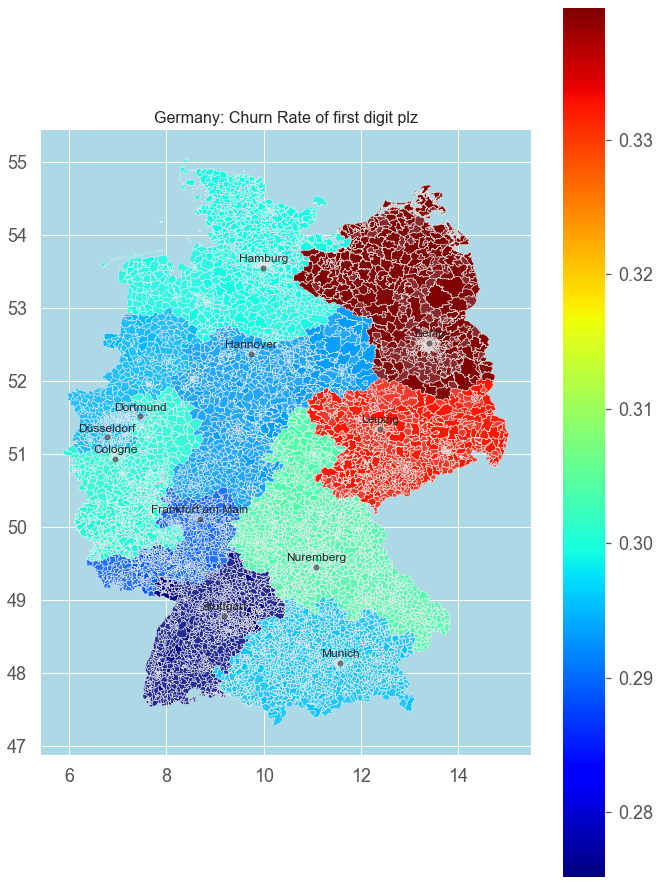

In [50]:
fig, ax = plt.subplots(figsize=(11,16))

germany_df.plot(
    ax=ax, 
    column='churn_plz_1', 
    categorical=False, 
    legend=True, 
    cmap='jet',
    alpha=0.8,

)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Churn Rate of first digit plz', 
    aspect=1.5, 
    facecolor='lightblue'
);
fig.savefig('plots/churn_rate_landscape_plz_1_digit.png',dpi=300)

We can now visually see the higher churn rate in the eastern part of Germany. 

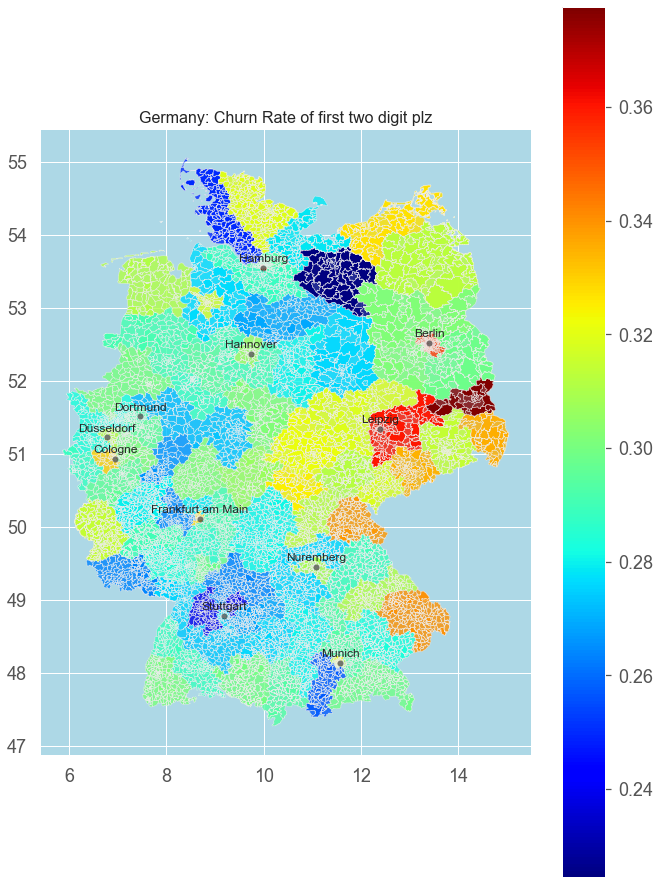

In [51]:
fig, ax = plt.subplots(figsize=(11,16))

germany_df.plot(
    ax=ax, 
    column='churn_plz_2', 
    categorical=False, 
    legend=True, 
    cmap='jet',
    alpha=0.8,

)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Churn Rate of first two digit plz', 
    aspect=1.5, 
    facecolor='lightblue'
);
fig.savefig('plots/churn_rate_landscape_plz_2_digit.png',dpi=300)

Now we can more clearly see some smaller regions with much lower and much higher churn rates.

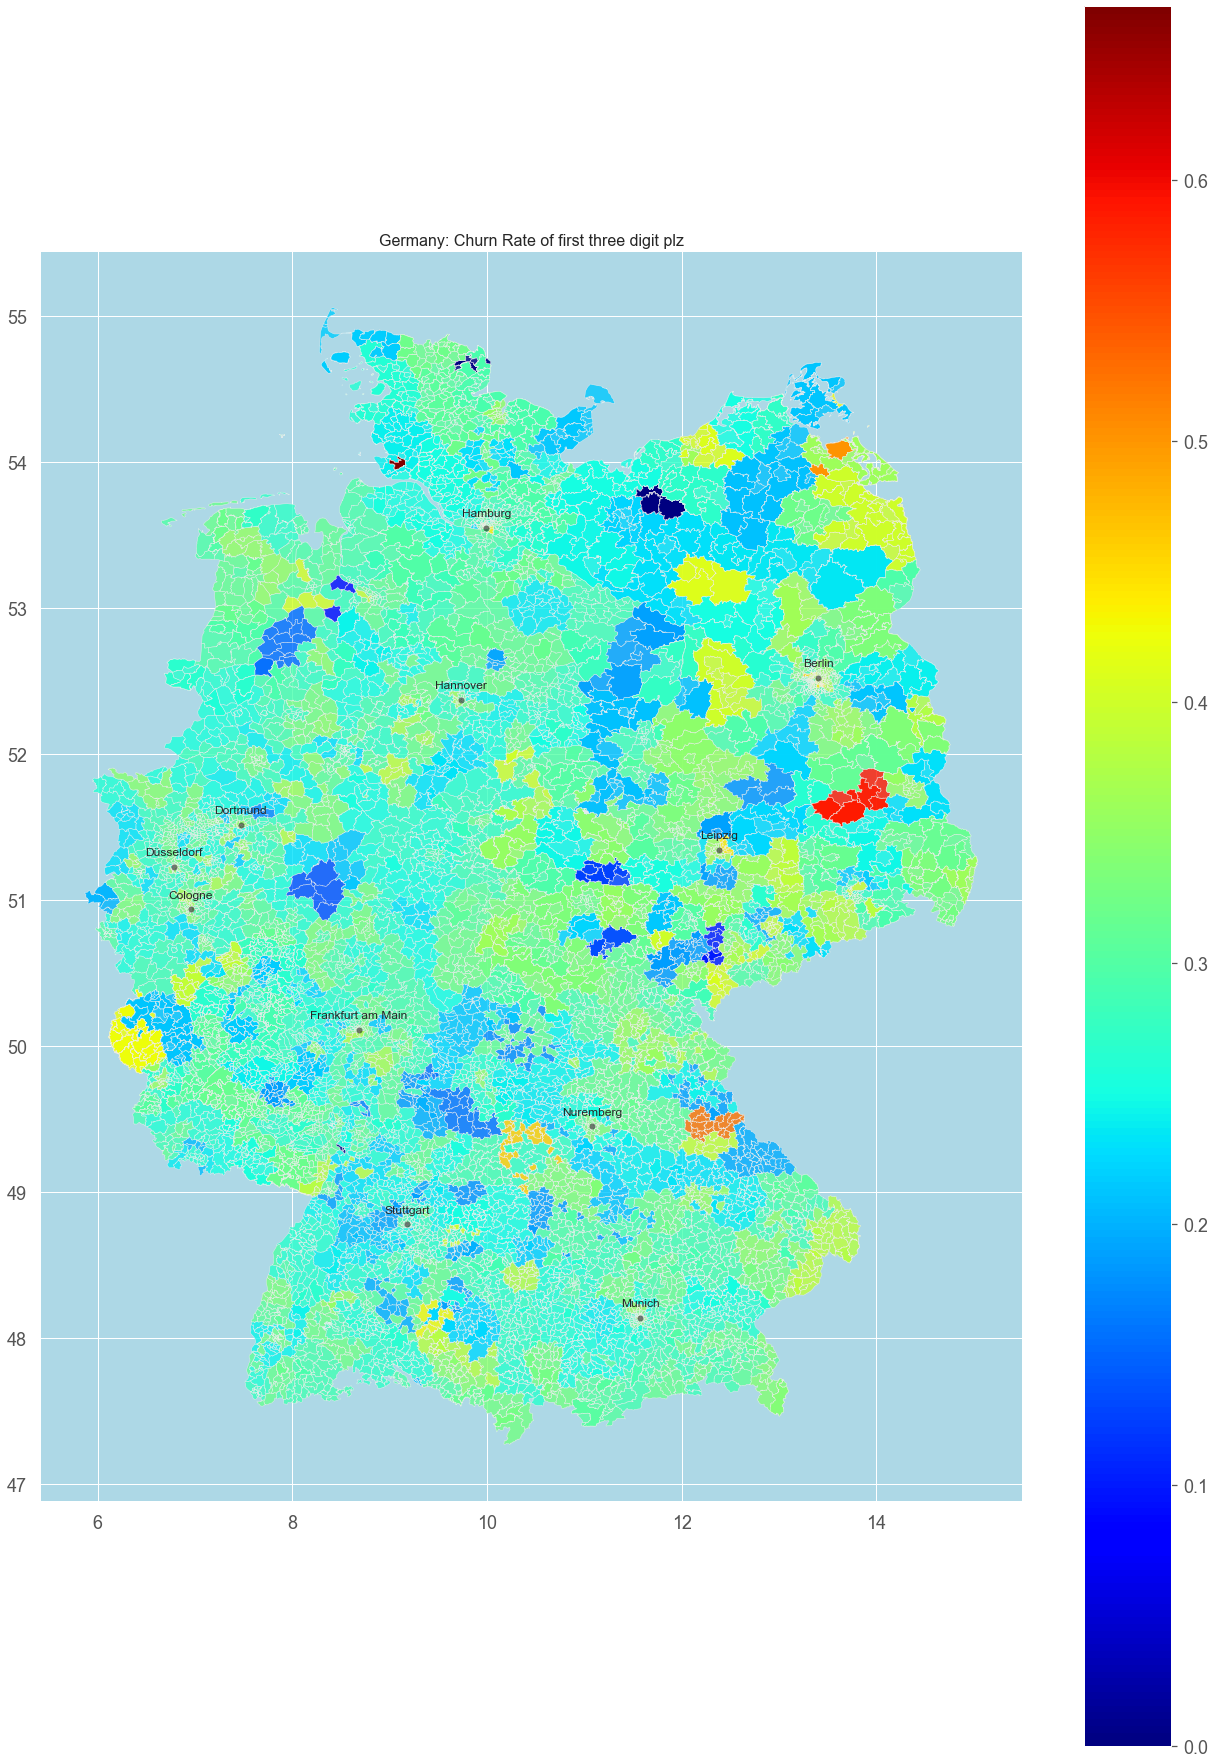

In [234]:
fig, ax = plt.subplots(figsize=(11,16))

germany_df.plot(
    ax=ax, 
    column='churn_plz_3', 
    categorical=False, 
    legend=True, 
    cmap='jet',
    alpha=0.8,

)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Churn Rate of first three digit plz', 
    aspect=1.5, 
    facecolor='lightblue'
);
fig.savefig('plots/churn_rate_landscape_plz_3_digit.png',dpi=300)

This gives us a very detailled overview of the geographical distribution of the churn rate, with much less flattening of the data. We can observe areas with almost zero churn rate and regions with more than 60 percent churn rate.  

### Metropole

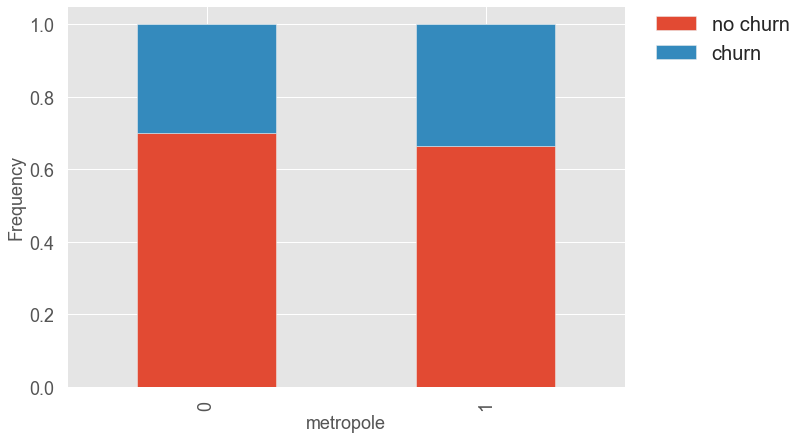

In [53]:
metropole_churn = crosstab_evaluation(df.metropole,df.churn)
crosstab_barplot(metropole_churn,['no churn','churn'],xlabelname='metropole')

No significant influence if either a metropolitan city or not is found. 

### Land iso code

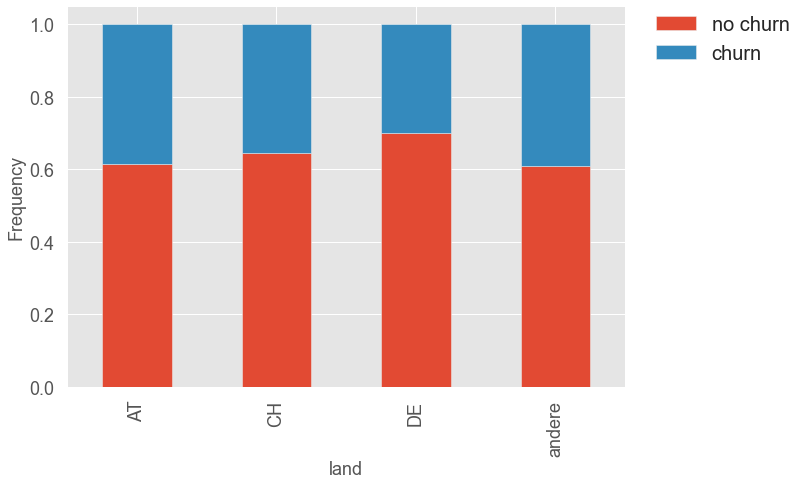

In [54]:
land_iso_churn = crosstab_evaluation(df.land_iso_code,df.churn)
crosstab_barplot(land_iso_churn,['no churn','churn'],xlabelname='land')

Germany has the highest churn rate, people from abroad (Austria (AT), Switzerland (CH) and other countries abroad) tend to churn with a lower probability. People from abroad who are subscribers tend to be more commited to their subscription. 

### Ort/City

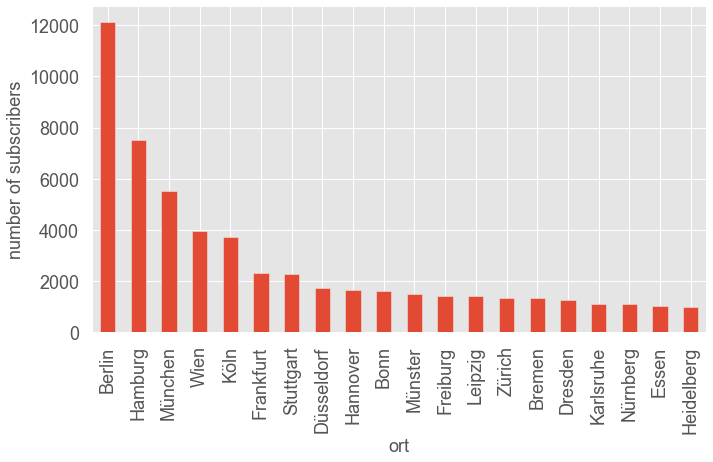

In [235]:
a = df.groupby('ort').size().nlargest(20)
a.plot(kind='bar',ylabel='number of subscribers',figsize=(11,6));

The Zeit Top City is Berlin, followed by Hamburg and Munich. Vienna surpsisingly has a quite high number of subscribers of about 4000.

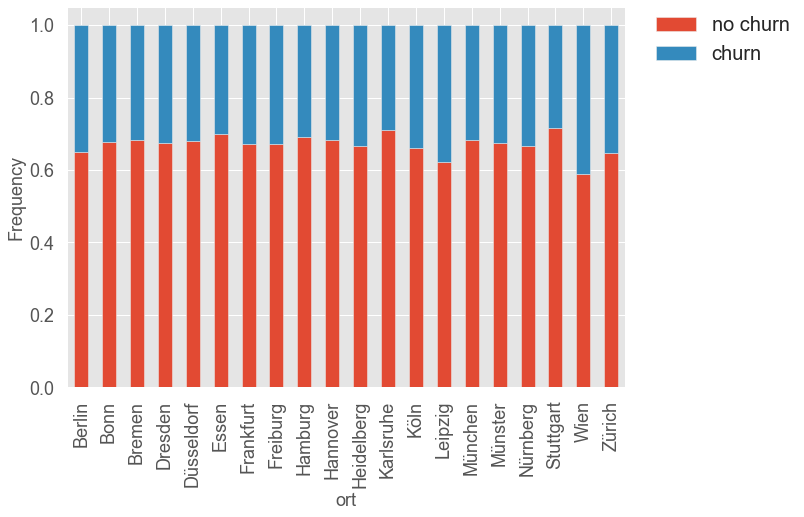

In [56]:
b = list(a.index)
df_top_cities = df[df['ort'].apply((lambda x: x in b))]

ort_churn = crosstab_evaluation(df_top_cities.ort,df_top_cities.churn)
crosstab_barplot(ort_churn,['no churn','churn'],xlabelname='ort')

The churn rate varies over the twenty largest cities. 

### Summary Customer Related Features

To sum up, the following was found about the customer related features:

- **anrede**: Small differences: keep feature.
- **titel**: Smaller churn rate for academic titles compared to no title: keep feature
- **plz_1, plz_2, plz_3**: The plz code gives us a very detailled overview of the geographical distribution of the churn rate: keep feature  
- **ort:** Geographic information, but similar to plz: should be dropped
- **metropole:** Just slight difference in churn rate: keep feature
- **land_iso_code:** There is a country influence on the churn rate: keep feature

## Subscription Features - Jonas

The following features are related to the subscription kind and shortly described:

- kanal
- objekt_name 
- aboform_name
- zahlung_rhythmus_name
- rechnungsmonat
- zahlung_weg_name 
- studentenabo
- unterbrechung

### Kanal

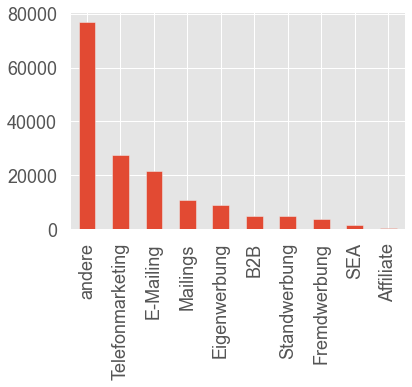

In [57]:
df.kanal.value_counts().plot(kind='bar');

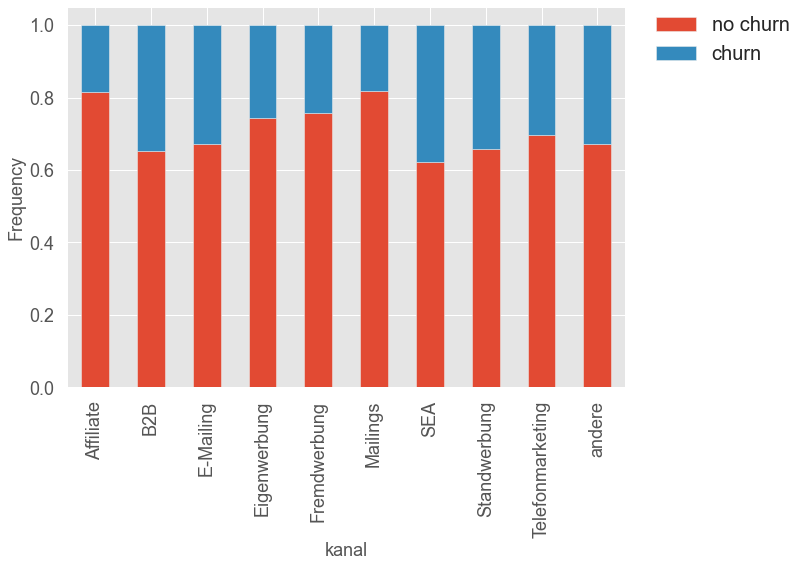

In [264]:
kanal_churn = crosstab_evaluation(df.kanal,df.churn)
# sort crosstable by churn probability
#kanal_churn.sort_values(by=1,ascending=True,inplace=True)
crosstab_barplot(kanal_churn,['no churn','churn'],xlabelname='kanal')

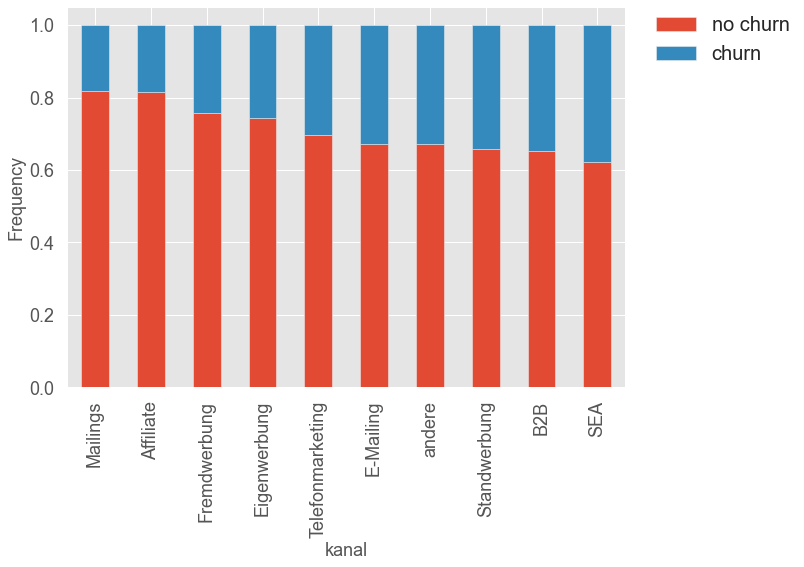

In [265]:
kanal_churn = crosstab_evaluation(df.kanal,df.churn)
# sort crosstable by churn probability
kanal_churn.sort_values(by=1,ascending=True,inplace=True)
crosstab_barplot(kanal_churn,['no churn','churn'],xlabelname='kanal')

The channel of the subrscitpion is an important feature for churn. The churn rate increases from less than 20 percent for mailings to almost 40 percent for SEA (Search Engine Advertising).  

### cnt_abo

(0.0, 10.0)

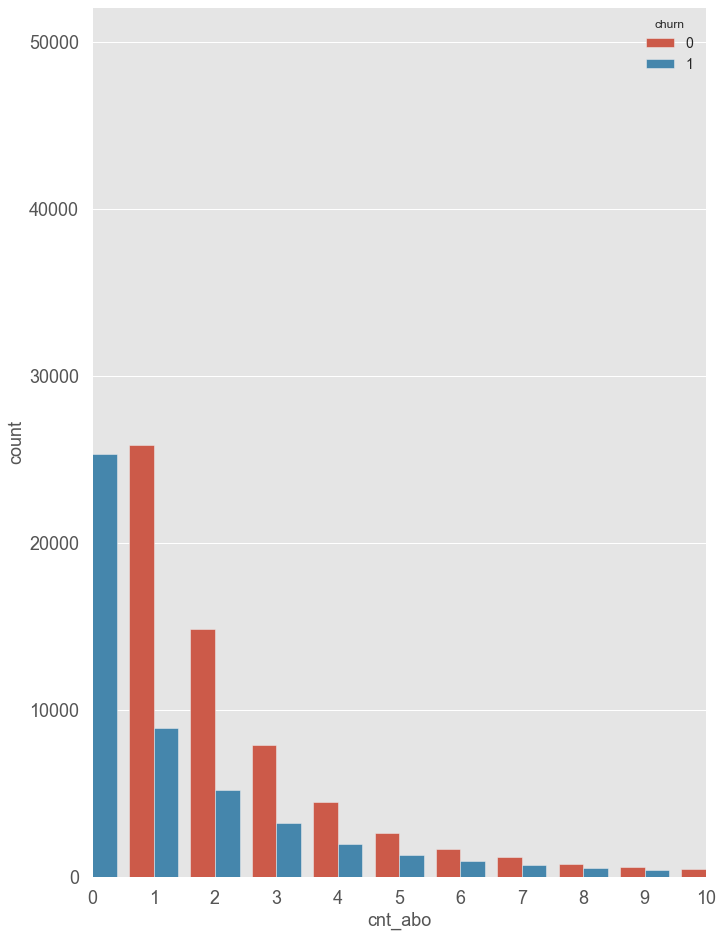

In [59]:
fig, ax = plt.subplots(figsize=(11,16))
ax = sns.countplot(x="cnt_abo", hue='churn',data=df)
ax.set_xlim(0,10)

### objekt_name

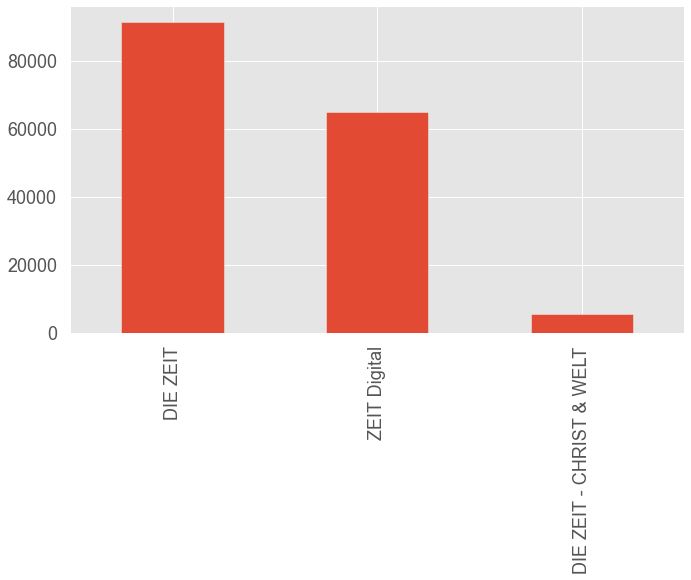

In [60]:
df.objekt_name.value_counts().plot(kind='bar',figsize=(11,6));

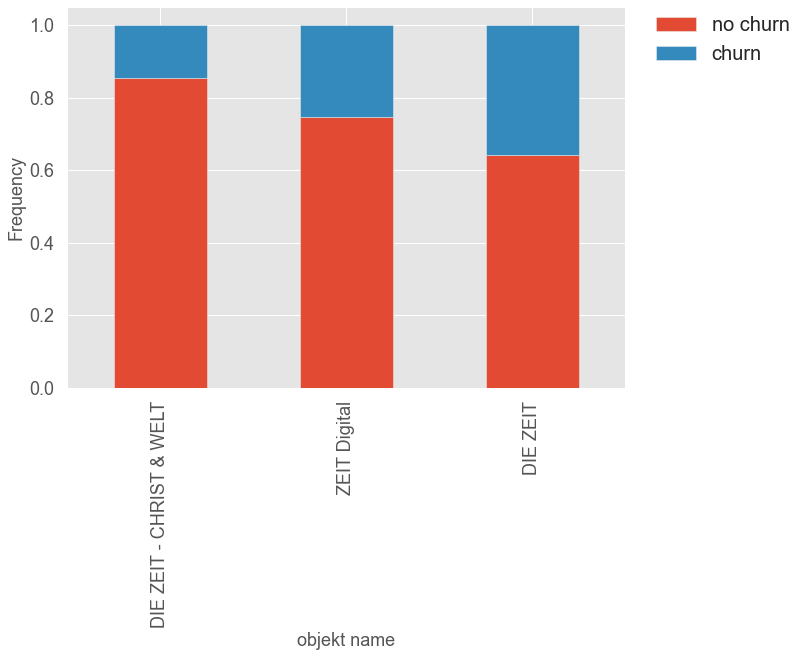

In [267]:
objekt_churn = crosstab_evaluation(df.objekt_name,df.churn)
objekt_churn.sort_values(by=1,ascending=True,inplace=True)
crosstab_barplot(objekt_churn,['no churn','churn'],xlabelname='objekt name')

Combined subscription of Die Zeit with Christ & Welt has a remarkably smaller churn rate than Zeit Digital and Die Zeit print. 

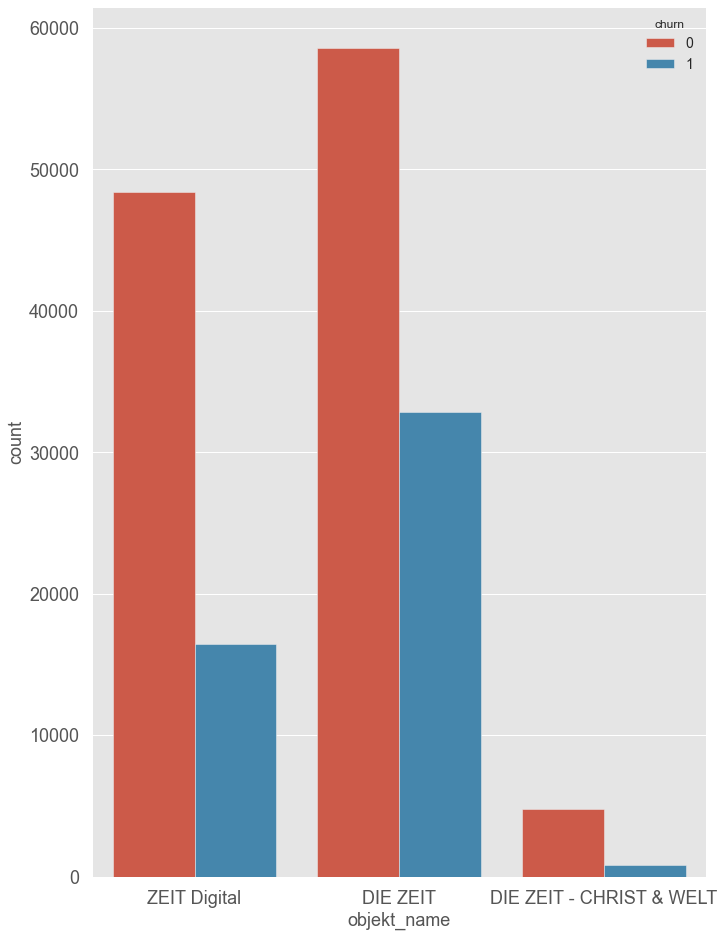

In [62]:
fig, ax = plt.subplots(figsize=(11,16))
ax = sns.countplot(x="objekt_name", hue='churn',data=df)

### aboform_name

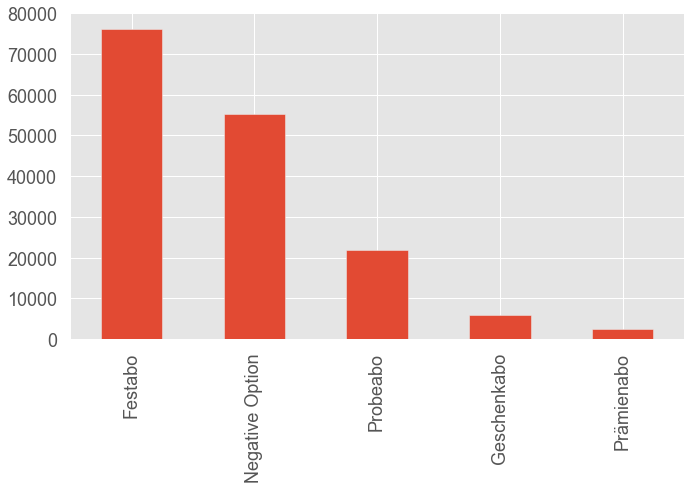

In [63]:
df.aboform_name.value_counts().plot(kind='bar',figsize=(11,6));

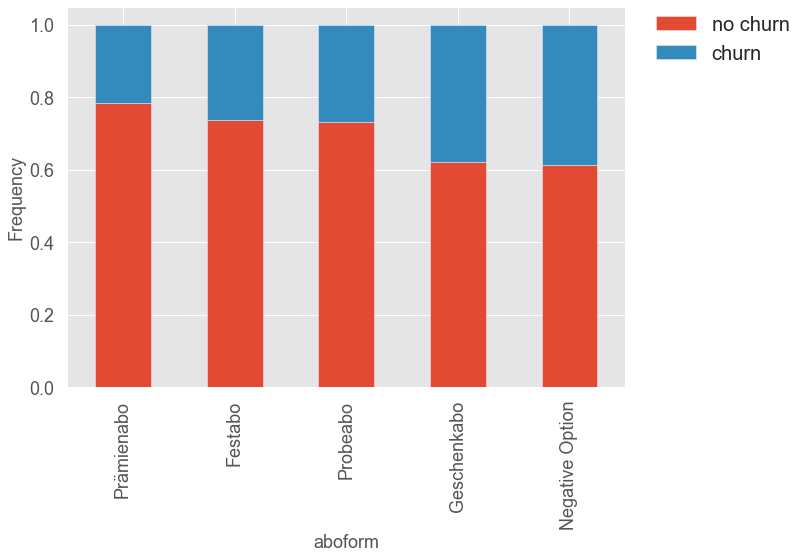

In [268]:
aboform_churn = crosstab_evaluation(df.aboform_name,df.churn)
aboform_churn.sort_values(by=1,ascending=True,inplace=True)
crosstab_barplot(aboform_churn,['no churn','churn'],xlabelname='aboform')

Also here, we can see that Prämienabo has a much smaller churn rate than others, in particular Geschenkabo and Negative Option. 

### zahlung_rhythmus_name

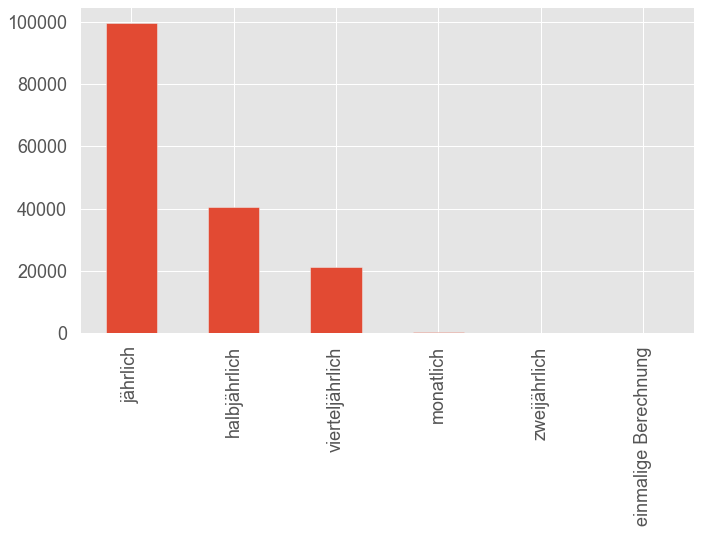

In [65]:
df.zahlung_rhythmus_name.value_counts().plot(kind='bar',figsize=(11,6));

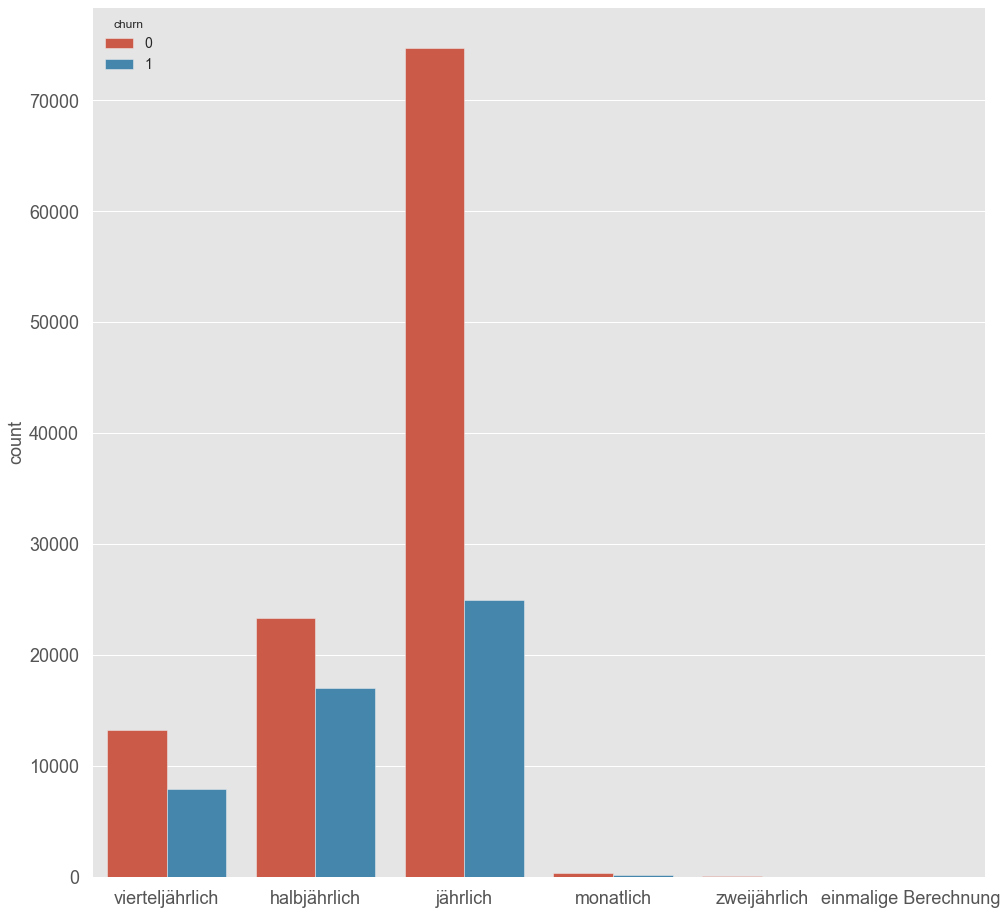

In [66]:
fig, ax = plt.subplots(figsize=(16,16))
ax = sns.countplot(x='zahlung_rhythmus_name',data=df,hue='churn')
ax.set_xlabel('');

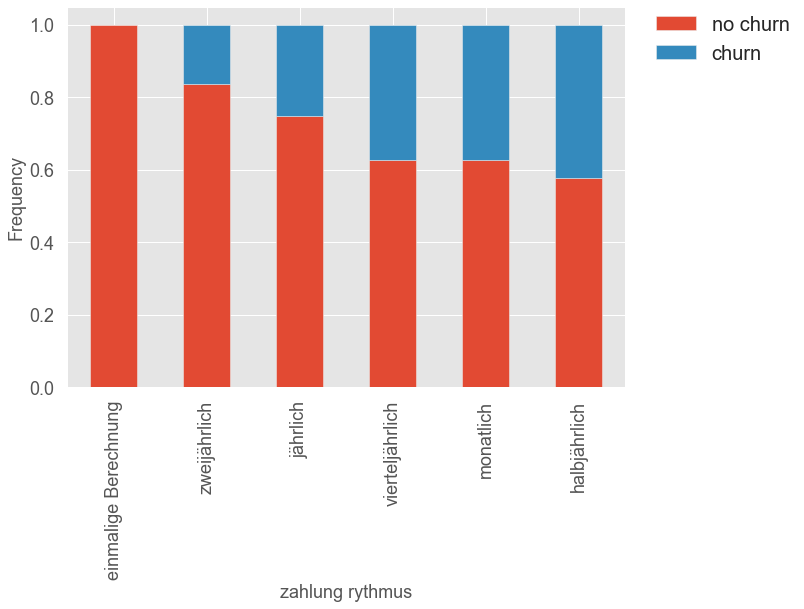

In [269]:
zahlung_rythmus_churn = crosstab_evaluation(df.zahlung_rhythmus_name,df.churn)
zahlung_rythmus_churn.sort_values(by=1,inplace=True,ascending=True)
crosstab_barplot(zahlung_rythmus_churn,['no churn','churn'],xlabelname='zahlung rythmus')

We can observe a strong dependence of the payment period on the churn rate. Payments with less than one year period tend to have higher churn rates.

### rechnungsmonat

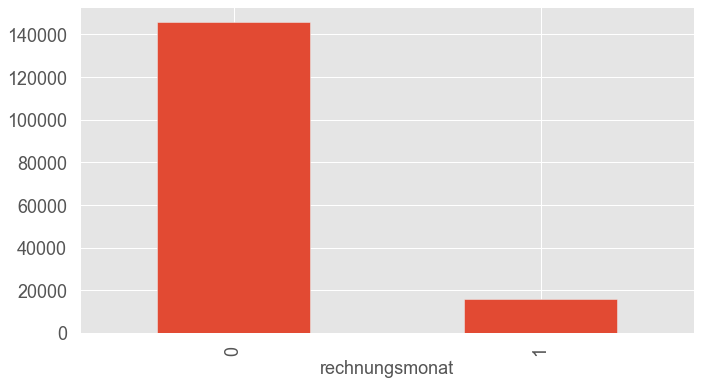

In [68]:
df.rechnungsmonat.value_counts().plot(kind='bar',figsize=(11,6));
plt.xlabel('rechnungsmonat');

Rechnungsmonat? What is the meaning?

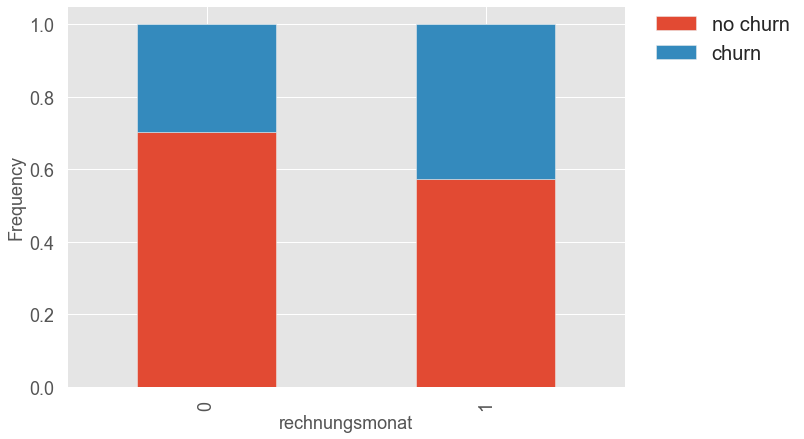

In [69]:
rechnungsmonat_churn = crosstab_evaluation(df.rechnungsmonat,df.churn)
crosstab_barplot(rechnungsmonat_churn,['no churn','churn'],xlabelname='rechnungsmonat')

If there is a billing months, a subscriber has a higher tendency to churn the subscription than without a billing month. 

### zahlung_weg_name

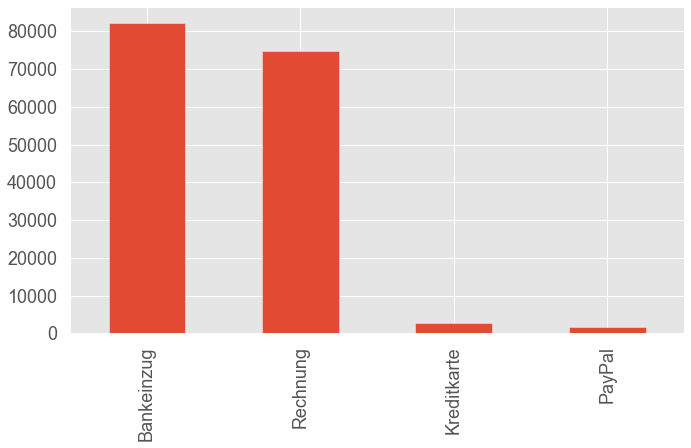

In [70]:
df.zahlung_weg_name.value_counts().plot(kind='bar',figsize=(11,6));

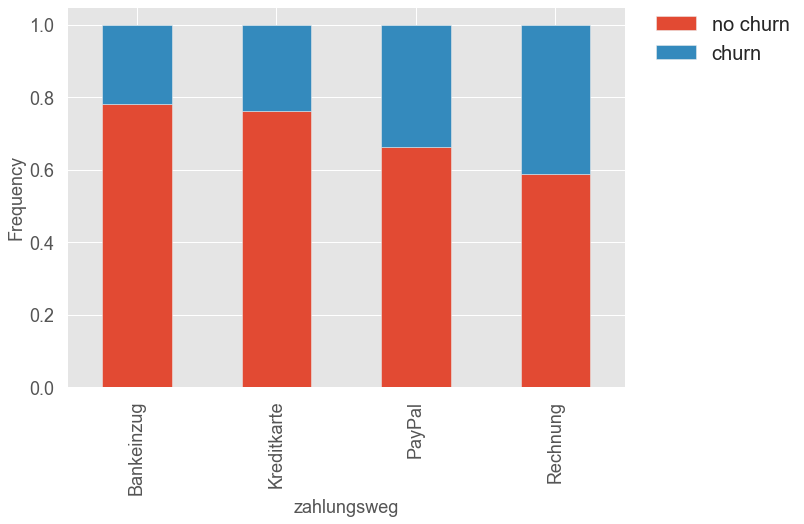

In [71]:
zahlungsweg_churn = crosstab_evaluation(df.zahlung_weg_name,df.churn)
crosstab_barplot(zahlungsweg_churn,['no churn','churn'],xlabelname='zahlungsweg')

If the payment is made by direct debit (Bankeinzug), the churn rate is much lower than if the payment is made by invoice. Credit Cards and Paypal are in between.

### studentenabo

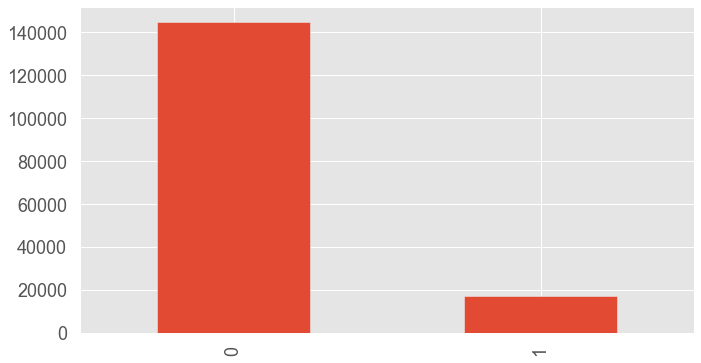

In [72]:
df.studentenabo.value_counts().plot(kind='bar',figsize=(11,6));

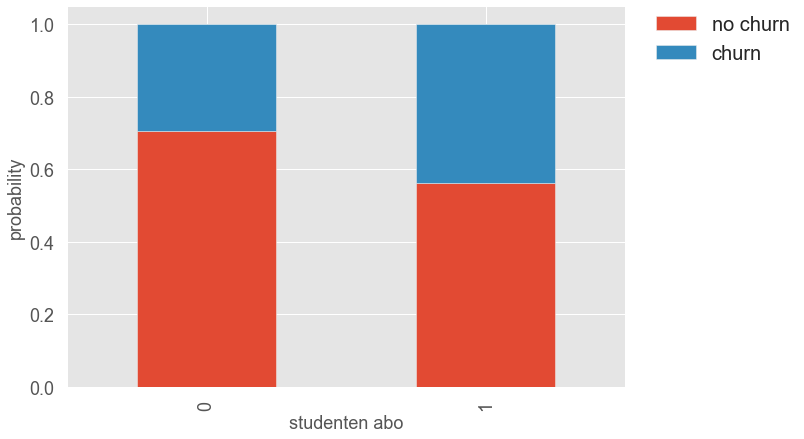

In [276]:
studentenabo_churn = crosstab_evaluation(df.studentenabo,df.churn)
crosstab_barplot(studentenabo_churn,['no churn','churn'],xlabelname='studenten abo')
plt.ylabel('probability');

The students tend to churn more frequently.

#### Studentenmap

In [74]:
plz3_students = crosstab_evaluation(df.plz_3,df.studentenabo)
#crosstab_barplot(plz3_students,['no student abo','student abo']ticklabelname='PLZ 3',figsize_x=50)

In [75]:
def convert_plz_3_to_student(plz):
    index = str(plz)[0:3]
    #print(index)
    value = plz3_students[plz3_students.index == index].iloc[0,1]
    #print(value)
    return value

In [76]:
germany_df['studenten_plz_3'] = germany_df.plz.apply(lambda x: convert_plz_3_to_student(x))

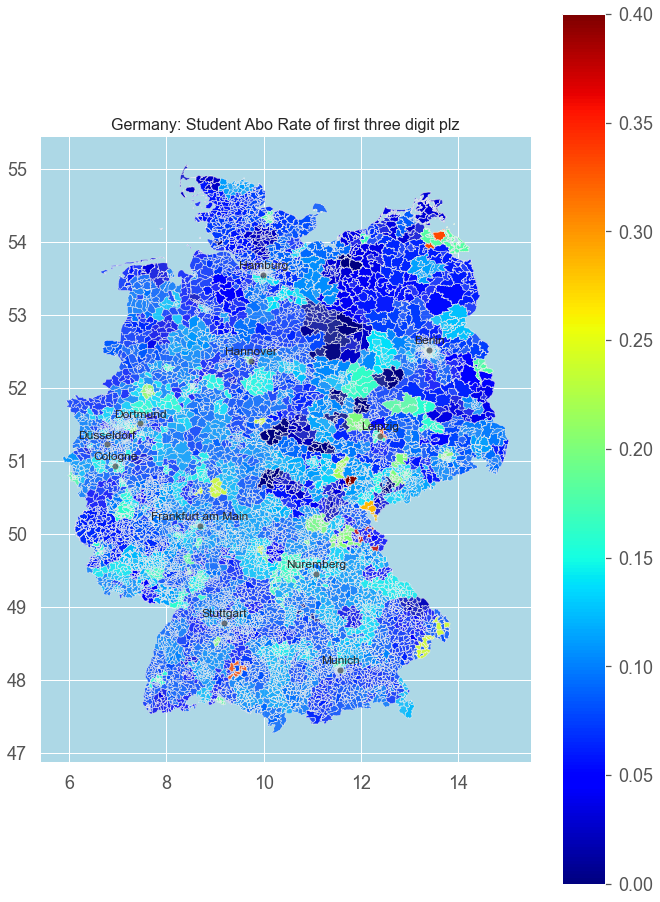

In [77]:
fig, ax = plt.subplots(figsize=(11,16))

germany_df.plot(
    ax=ax, 
    column='studenten_plz_3', 
    categorical=False, 
    legend=True, 
    cmap='jet',
    alpha=0.8,

)

for c in top_cities.keys():

    ax.text(
        x=top_cities[c][0], 
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )

    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )
    
ax.set(
    title='Germany: Student Abo Rate of first three digit plz', 
    aspect=1.5, 
    facecolor='lightblue'
);
fig.savefig('plots/student_abo_rate.png',dpi=300)

Here we can see where the student churn rate is the highest and where it is the lowest.

### unterbrechung

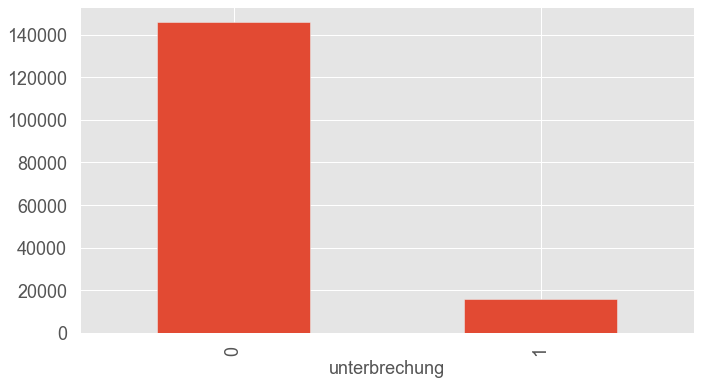

In [78]:
df.unterbrechung.value_counts().plot(kind='bar',figsize=(11,6));
plt.xlabel('unterbrechung');

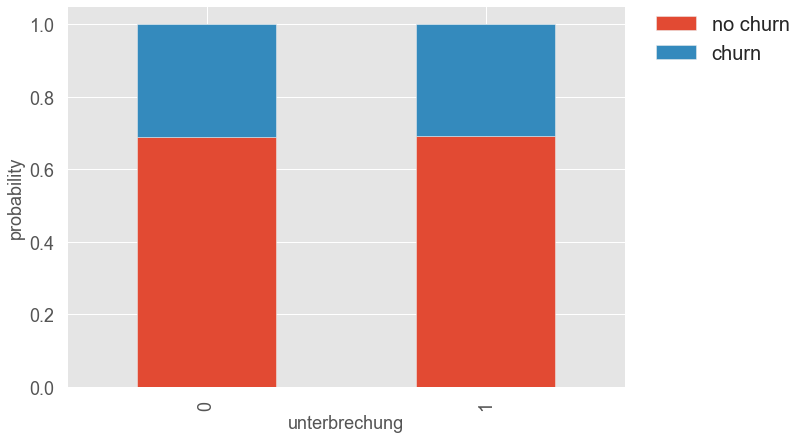

In [79]:
unterbrechung_churn = crosstab_evaluation(df.unterbrechung,df.churn)
crosstab_barplot(unterbrechung_churn,['no churn','churn'],xlabelname='unterbrechung')
plt.ylabel('probability');

The churn rate for interruptions of the subscription seems to be the same.  

### Summary Subscription Data

To sum up, the following was found about the subscription related features:

- **kanal:** An important feature for churn (20 to almost 40 percent churn rate for different channels: keep feature  
- **objekt_name:** Combined subscription have much less churn than digital and print subscriptions: keep feature  
- **aboform_name:** Churn rate is dependent on the form of subscription: keep feature 
- **zahlung_rhythmus_name:** Dependence of the payment period on the churn rate: keep feature
- **rechnungsmonat:** If there is a billing months, a subscriber has a higher tendency to churn: keep feature
- **zahlung_weg_name:** Direct debit (Bankeinzug) churn rate is much lower than if the payment is made by invoice: keep feature 
- **studentenabo:** Students tend to churn more frequently: keep feature
- **unterbrechung:** The churn rate for interruptions of the subscription seems to be the same: could be kept!

## Time/Temporal Features - Jonas

The following features are related to time subscription kind and shortly described: 
- lesedauer
- liefer_beginn_evt
- abo_registrierung_min
- nl_registrierung_min
- date_x
- kuendigungs_eingangs_datum


### lesedauer

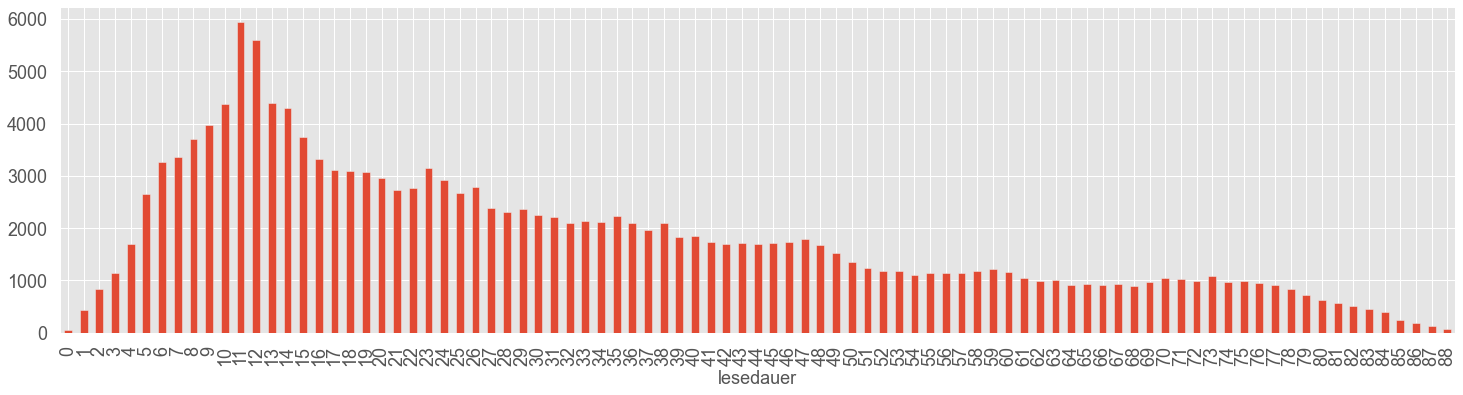

In [80]:
df.lesedauer.value_counts().sort_index().plot(kind='bar',figsize=(25,6));
#df.lesedauer.value_counts().sort_values('lesedauer').plot(kind='bar',figsize=(25,6));
plt.xlabel('lesedauer');

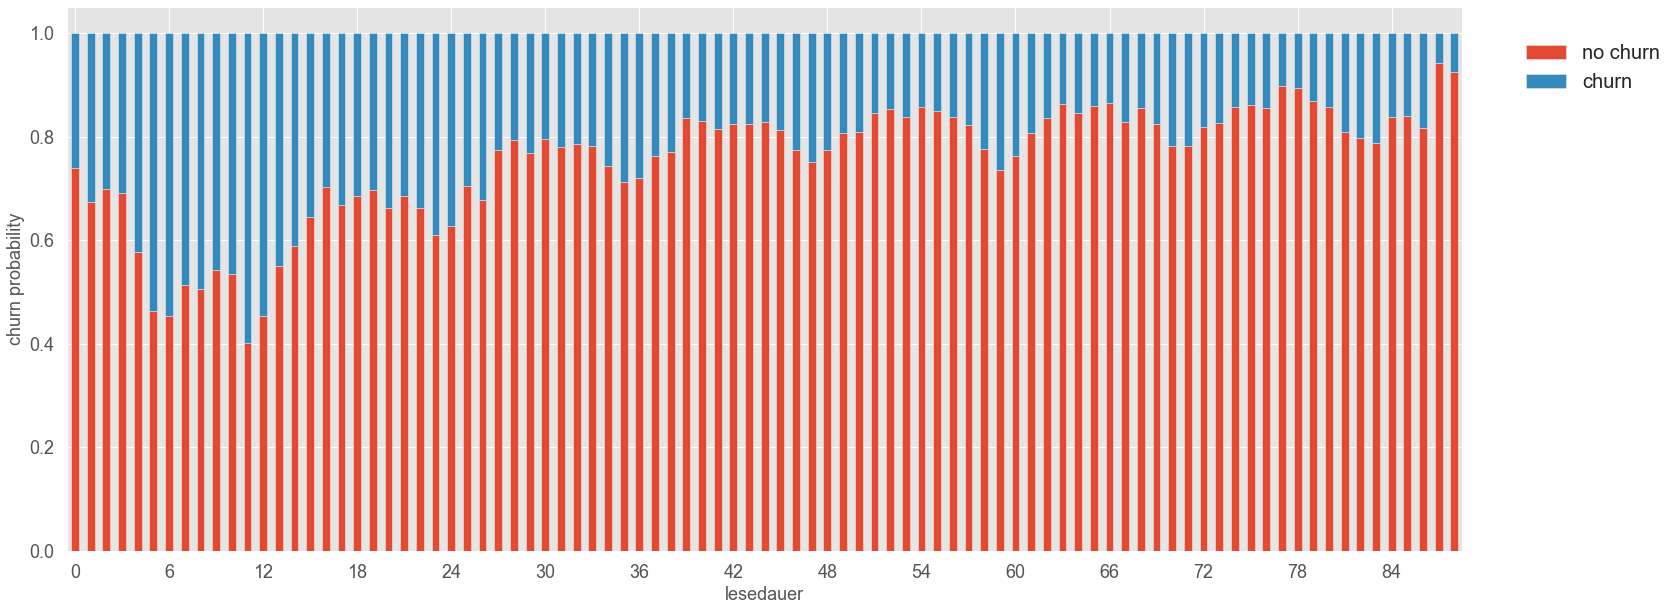

In [239]:
lesedauer_churn = crosstab_evaluation(df.lesedauer,df.churn)
crosstab_barplot(lesedauer_churn,['no churn','churn'],xlabelname='lesedauer',figsize_x=25,figsize_y=10)
plt.ylabel('churn probability');
plt.xticks(np.arange(0, 88, 6.0),rotation=0);

The lesedauer is an important measure for the churn probability. With fewer months of lesedauer, the churn rate decreases, and then after 12 months there is a wave pattern with a period of 12 months (24, 36, 38, 60 months and so on) in which the churn rate increases.  )

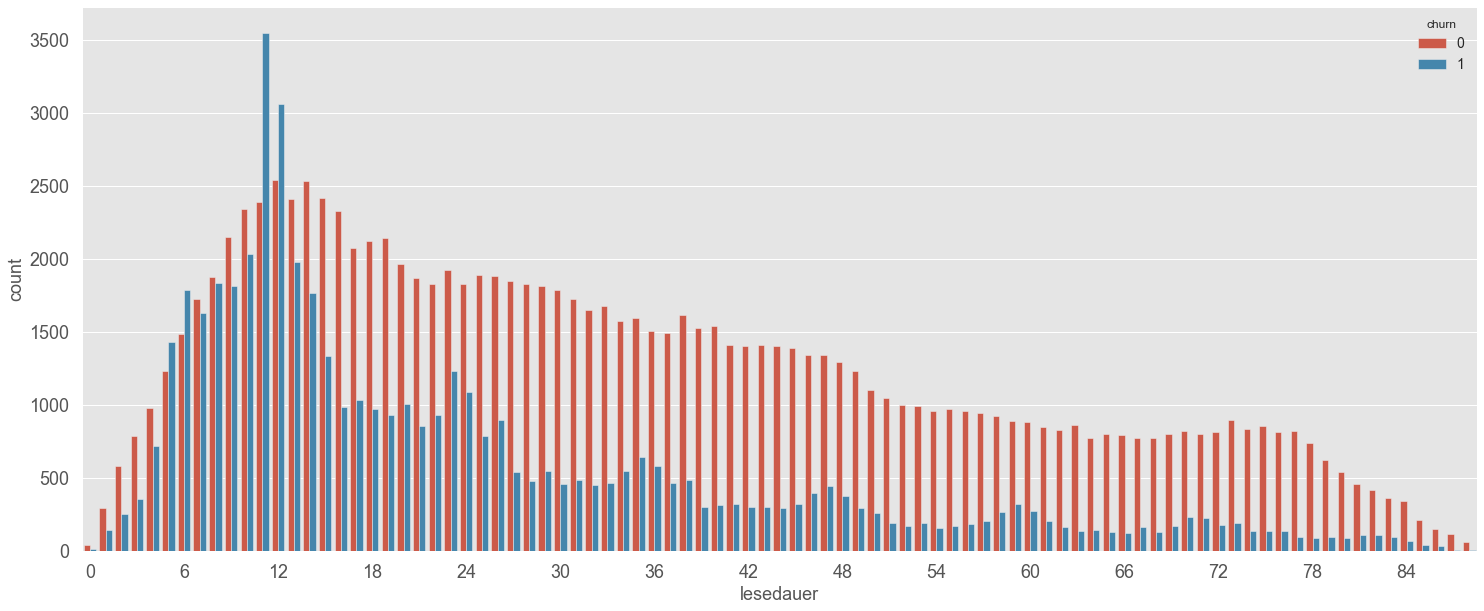

In [82]:
fig, ax = plt.subplots(figsize=(25,10))
ax = sns.countplot(x='lesedauer',data=df,hue='churn')
ax.set_xlabel('');
plt.xticks(np.arange(0, 88, 6.0));
plt.xlabel('lesedauer');

### liefer_beginn_evt

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161760 entries, 0 to 161759
Columns: 169 entries, auftrag_new_id to date_x
dtypes: float64(31), int64(120), object(18)
memory usage: 208.6+ MB


In [84]:
df.liefer_beginn_evt.isna().sum()

0

In [85]:
# convert liefer beginn to datetime
df.liefer_beginn_evt.head()

0    2018-08-29
1    2018-08-29
2    2018-10-31
3    2018-08-01
4    2018-08-29
Name: liefer_beginn_evt, dtype: object

In [86]:
df['liefer_beginn_evt'] = pd.to_datetime(df['liefer_beginn_evt'])
#df['liefer_beginn_evt'] = df['liefer_beginn_evt'].dt.date
df.liefer_beginn_evt.describe()

count     161760             
unique    406                
top       2019-01-10 00:00:00
freq      1310               
first     2013-01-03 00:00:00
last      2019-05-23 00:00:00
Name: liefer_beginn_evt, dtype: object

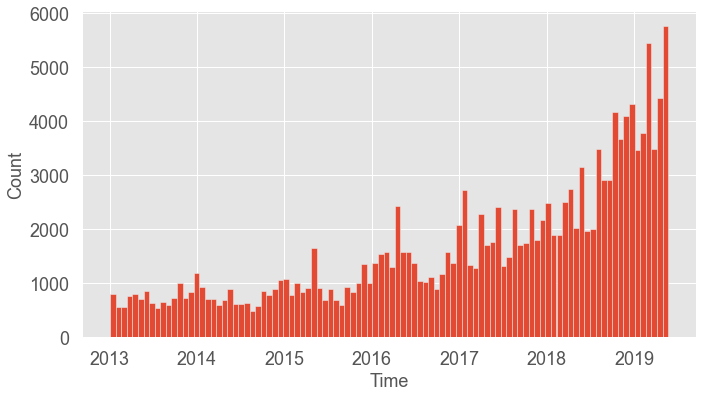

In [88]:
df.liefer_beginn_evt.hist(bins=100,figsize=(11,6));
plt.xlabel('Time');
plt.ylabel('Count');

In [ ]:
#plt.subplots(figsize=(15,6))
#ax = sns.countplot(x='liefer_beginn_evt', data=df)
#ax.set(xlabel='liefer_beginn_evt', ylabel='Frequency')
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

### abo_registrierung_min

In [ ]:
df.abo_registrierung_min.isna().sum()

In [89]:
# convert abo registrierung to datetime
df['abo_registrierung_min'] = pd.to_datetime(df['abo_registrierung_min'])
#df['abo_registrierung_min'] = df['abo_registrierung_min'].dt.date
df.abo_registrierung_min.describe()

count     161760             
unique    122299             
top       1900-01-01 00:00:00
freq      19815              
first     1900-01-01 00:00:00
last      2019-05-21 03:52:18
Name: abo_registrierung_min, dtype: object

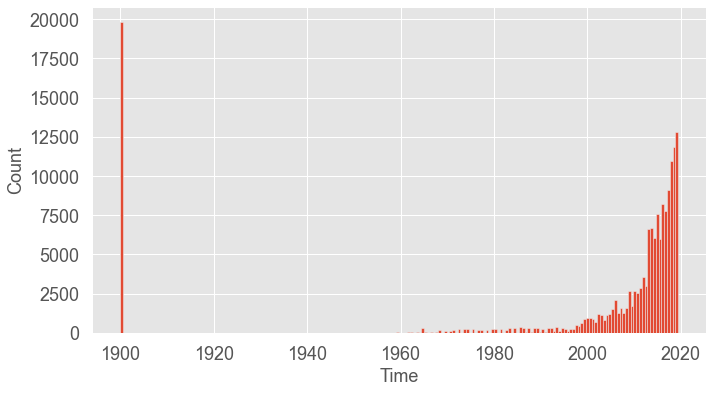

In [90]:
df.abo_registrierung_min.hist(bins=200,figsize=(11,6));
plt.xlabel('Time');
plt.ylabel('Count');

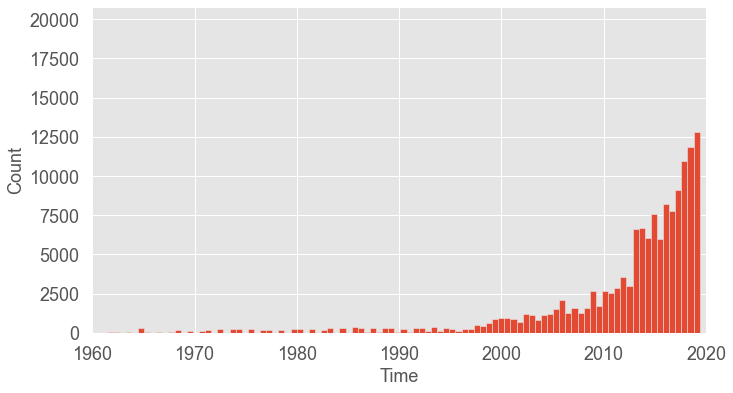

In [91]:
df.abo_registrierung_min.hist(bins=200,figsize=(11,6));
plt.xlabel('Time');
plt.ylabel('Count');
plt.xlim('1960-01-01','2020-01-01');

### nl_registrierung_min

In [180]:
df.nl_registrierung_min.isna().sum()

0

In [181]:
# convert nl_registrierung to datetime
df['nl_registrierung_min'] = pd.to_datetime(df['nl_registrierung_min'], format='%Y-%m-%d')
#df['nl_registrierung_min'] = df['nl_registrierung_min'].dt.date
df.nl_registrierung_min.describe()

count     161760             
unique    6455               
top       1900-01-01 00:00:00
freq      12976              
first     1900-01-01 00:00:00
last      2020-07-04 00:00:00
Name: nl_registrierung_min, dtype: object

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161760 entries, 0 to 161759
Columns: 169 entries, auftrag_new_id to date_x
dtypes: datetime64[ns](4), float64(31), int64(120), object(14)
memory usage: 208.6+ MB


In [183]:
df.nl_registrierung_min.head(2)

0   2013-03-13
1   2018-07-29
Name: nl_registrierung_min, dtype: datetime64[ns]

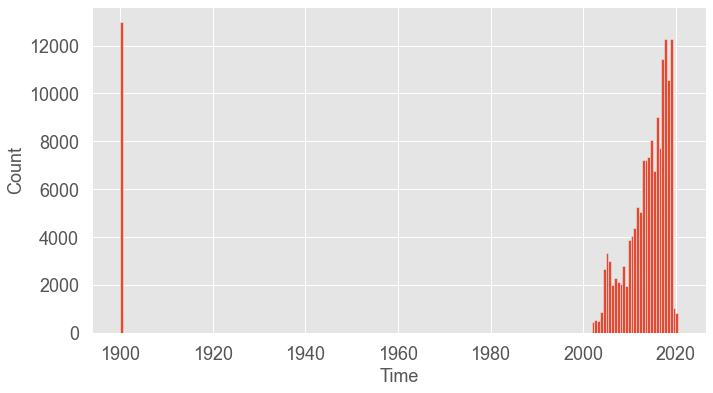

In [184]:
df.nl_registrierung_min.hist(bins=200,figsize=(11,6));
plt.xlabel('Time');
plt.ylabel('Count');

(array(10957.), array(18262.))

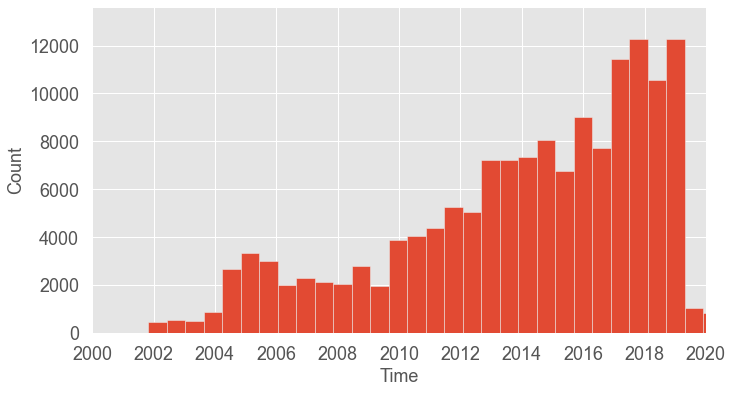

In [185]:
df.nl_registrierung_min.hist(bins=200,figsize=(11,6));
plt.xlabel('Time');
plt.ylabel('Count');
plt.xlim('2000-01-01','2020-01-01')

In [179]:
#df['nl_registrierung_min'] = [time.date() for time in df['nl_registrierung_min']]

In [186]:
df.nl_registrierung_min.head(2)

0   2013-03-13
1   2018-07-29
Name: nl_registrierung_min, dtype: datetime64[ns]

### date_x

In [101]:
df.date_x.isna().sum()

0

In [102]:
# convert date_x to datetime
df['date_x'] = pd.to_datetime(df['date_x'], format='%Y-%m-%d')
df['date_x'] = df['date_x'].dt.date
df.date_x.describe()

count     161760    
unique    367       
top       2020-01-02
freq      629       
Name: date_x, dtype: object

In [104]:
df.date_x.head(2)

0    2020-03-26
1    2020-05-11
Name: date_x, dtype: object

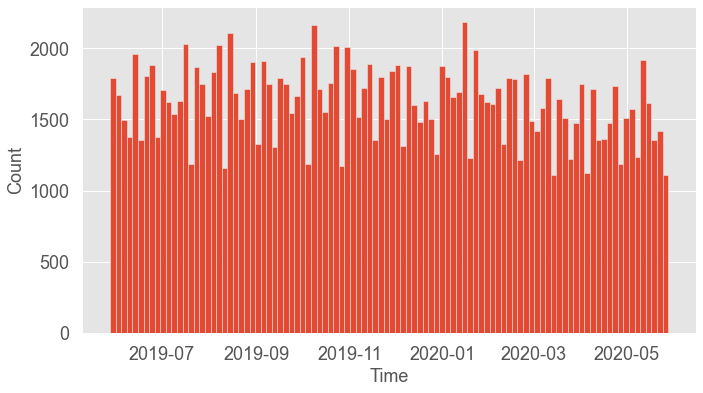

In [105]:
df.date_x.hist(bins=100,figsize=(11,6));
plt.xlabel('Time');
plt.ylabel('Count');

### kuendigungs_eingangs_datum

In [106]:
df.kuendigungs_eingangs_datum.isna().sum()

111691

In [107]:
df.kuendigungs_eingangs_datum.fillna(value='1900-01-01 00:00:00',inplace=True);

In [113]:
# convert date_x to datetime
df['kuendigungs_eingangs_datum'] = pd.to_datetime(df['kuendigungs_eingangs_datum'],errors='coerce',format='%Y-%m-%d')
#df['kuendigungs_eingangs_datum'] = df['kuendigungs_eingangs_datum'].dt.date
df.kuendigungs_eingangs_datum.describe()

count     161760             
unique    350                
top       1900-01-01 00:00:00
freq      111691             
first     1900-01-01 00:00:00
last      2020-05-28 00:00:00
Name: kuendigungs_eingangs_datum, dtype: object

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161760 entries, 0 to 161759
Columns: 169 entries, auftrag_new_id to date_x
dtypes: datetime64[ns](3), float64(31), int64(120), object(15)
memory usage: 208.6+ MB


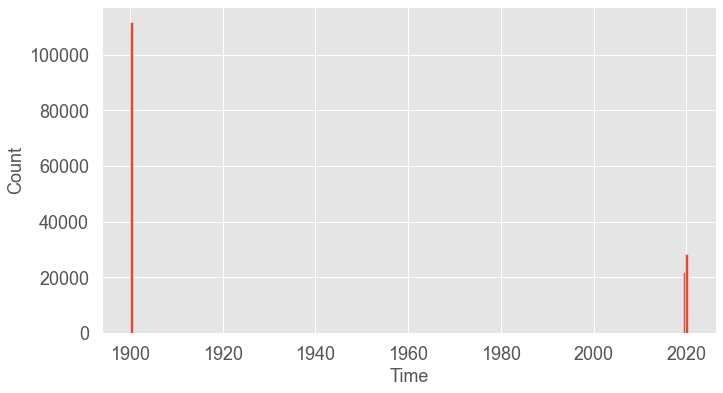

In [110]:
df.kuendigungs_eingangs_datum.hist(bins=200,figsize=(11,6));
plt.xlabel('Time');
plt.ylabel('Count');

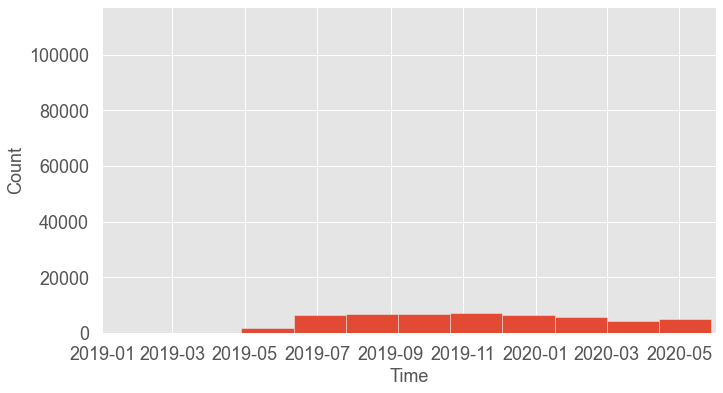

In [111]:
df.kuendigungs_eingangs_datum.hist(bins=1000,figsize=(11,6));
plt.xlabel('Time');
plt.ylabel('Count');
plt.xlim('2019-01-01','2020-06-01');
#plt.ylim(0,10000)

#### Kündigungen 2020

In [115]:
kuendigungen_2020 = df[df['kuendigungs_eingangs_datum'] > '2020-01-01']
kuendigungen_2020.shape

(17974, 169)

In [116]:
df['kuendigungs_eingangs_datum'][0]

Timestamp('1900-01-01 00:00:00')

In [117]:
kuendigungen_2020.kuendigungs_eingangs_datum.max()

Timestamp('2020-05-28 00:00:00')

In [118]:
kuendigungen_2020.kuendigungs_eingangs_datum.head()

1    2020-05-11
2    2020-03-18
7    2020-01-18
14   2020-01-06
17   2020-02-19
Name: kuendigungs_eingangs_datum, dtype: datetime64[ns]

In [119]:
kuendigungen_2020 = kuendigungen_2020.sort_values(by="kuendigungs_eingangs_datum",ascending=True)

In [120]:
kuendigungen_2020.head(2)

auftrag_new_id liefer_beginn_evt      kanal  \
154379  07C95FC6-7B61-4E2E-8CC3-0B0C00A96895 2017-12-14         E-Mailing   
99039   7A1A66E2-A596-4A0E-878D-C8129A0D875A 2016-07-07         andere      

       objekt_name     aboform_name zahlung_rhythmus_name  lesedauer  \
154379  DIE ZEIT    Negative Option  halbjährlich          25          
99039   DIE ZEIT    Probeabo         vierteljährlich       42          

        rechnungsmonat zahlung_weg_name  studentenabo plz_1 plz_2 plz_3  \
154379  0               Bankeinzug       0             9     93    930    
99039   0               Bankeinzug       0             5     53    532    

               ort  metropole land_iso_code  shop_kauf  unterbrechung anrede  \
154379  Regensburg  0          DE            0          0              Herr    
99039   Bonn        0          DE            0          0              Herr    

                     titel  avg_churn  zon_che_opt_in  zon_sit_opt_in  \
154379  akademischer Titel  0.338301   0               0                
99039   kein Titel          0.207373   0               0                

        zon_zp_grey  zon_premium  zon_boa  zon_kommentar  zon_sonstige  \
154379  0            1            0        0              0              
99039   2            0            0        0              0              

        zon_zp_red  zon_rawr  zon_community  zon_app_sonstige  zon_schach  \
154379  0           0         0              0                 0            
99039   0           0         0              0                 0            

        zon_blog_kommentare  zon_quiz  cnt_abo  cnt_abo_diezeit  \
154379  0                    0         10       9                 
99039   0                    0         0        0                 

        cnt_abo_diezeit_digital  cnt_abo_magazin  cnt_umwandlungsstatus2_dkey  \
154379  0                        1                0                             
99039   0                        0                0                             

       abo_registrierung_min  nl_zeitbrief  nl_zeitshop  \
154379 2003-03-12 13:40:56    1             0             
99039  2016-03-30 15:56:43    1             1             

        nl_zeitverlag_hamburg  nl_fdz_organisch  nl_blacklist_sum  \
154379  0                      0                 0                  
99039   0                      0                 0                  

        nl_bounced_sum  nl_aktivitaet nl_registrierung_min  nl_sperrliste_sum  \
154379  0               4              2017-02-08           0                   
99039   0               5              2006-09-27           0                   

        nl_opt_in_sum  boa_reg  che_reg  sit_reg  sso_reg  received_anzahl_1w  \
154379  0              0        0        0        1        0                    
99039   1              0        0        0        1        0                    

        received_anzahl_1m  received_anzahl_3m  received_anzahl_6m  \
154379  0                   0                   0                    
99039   0                   0                   0                    

        opened_anzahl_1w  opened_anzahl_1m  opened_anzahl_3m  openedanzahl_6m  \
154379  0                 0                 0                 0                 
99039   0                 0                 0                 0                 

        clicked_anzahl_1w  clicked_anzahl_1m  clicked_anzahl_3m  \
154379  0                  0                  0                   
99039   0                  0                  0                   

        clicked_anzahl_6m  unsubscribed_anzahl_1w  unsubscribed_anzahl_1m  \
154379  0                  0                       0                        
99039   0                  0                       0                        

        unsubscribed_anzahl_3m  unsubscribed_anzahl_6m  openrate_1w  \
154379  0                       0                       0.0           
99039   0                       0                       0.0           

        clickrat

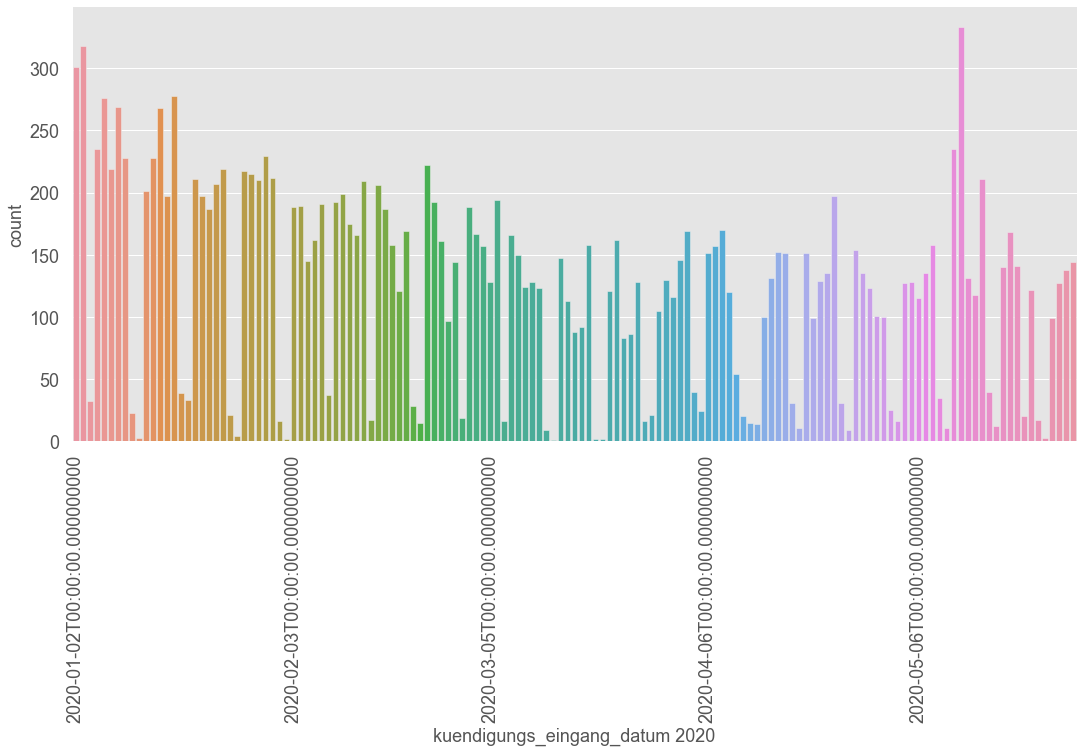

In [129]:
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib.dates import DateFormatter, MonthLocator, YearLocator

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(18,8))

sns.countplot(kuendigungen_2020['kuendigungs_eingangs_datum']);
plt.xticks(rotation=90);
plt.xlabel('kuendigungs_eingang_datum 2020')

months = MonthLocator()
monthsFmt = DateFormatter("%b")

years = YearLocator()
yearsFmt = DateFormatter("%y")

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

#ax.xaxis.set_major_locator(months)
#ax.xaxis.set_major_formatter(monthsFmt)

#### Kündigungen 2019

In [122]:
kuendigungen_2019 = df[(df['kuendigungs_eingangs_datum'] < '2020-01-01') & (df['kuendigungs_eingangs_datum'] > '2019-01-01')]
kuendigungen_2019.shape

(32095, 169)

In [123]:
kuendigungen_2019.kuendigungs_eingangs_datum.min()

Timestamp('2019-05-28 00:00:00')

In [124]:
kuendigungen_2019.kuendigungs_eingangs_datum.head()

6    2019-08-16
12   2019-10-28
16   2019-07-19
21   2019-10-08
22   2019-09-05
Name: kuendigungs_eingangs_datum, dtype: datetime64[ns]

In [125]:
kuendigungen_2019 = kuendigungen_2019.sort_values(by="kuendigungs_eingangs_datum",ascending=True)

In [126]:
kuendigungen_2019.head(2)

auftrag_new_id liefer_beginn_evt  \
2672    1790F6C7-56E7-4C8F-A69F-2373961B33F2 2018-08-02          
122188  F6D0AEED-3521-41B7-889E-7045F8816D30 2016-09-01          

                   kanal objekt_name aboform_name zahlung_rhythmus_name  \
2672    E-Mailing         DIE ZEIT    Probeabo     jährlich               
122188  Telefonmarketing  DIE ZEIT    Festabo      jährlich               

        lesedauer  rechnungsmonat zahlung_weg_name  studentenabo plz_1 plz_2  \
2672    9          0               Rechnung         0             3     30     
122188  32         0               Rechnung         0             4     47     

       plz_3         ort  metropole land_iso_code  shop_kauf  unterbrechung  \
2672    309   Isernhagen  0          DE            0          1               
122188  478   Willich     0          DE            2          1               

       anrede       titel  avg_churn  zon_che_opt_in  zon_sit_opt_in  \
2672    Herr   kein Titel  0.383986   0               0                
122188  Frau   kein Titel  0.140822   0               0                

        zon_zp_grey  zon_premium  zon_boa  zon_kommentar  zon_sonstige  \
2672    1            0            0        0              0              
122188  0            1            0        0              0              

        zon_zp_red  zon_rawr  zon_community  zon_app_sonstige  zon_schach  \
2672    0           0         0              0                 0            
122188  0           0         0              0                 0            

        zon_blog_kommentare  zon_quiz  cnt_abo  cnt_abo_diezeit  \
2672    0                    0         0        0                 
122188  0                    0         2        1                 

        cnt_abo_diezeit_digital  cnt_abo_magazin  cnt_umwandlungsstatus2_dkey  \
2672    0                        0                0                             
122188  0                        1                1                             

       abo_registrierung_min  nl_zeitbrief  nl_zeitshop  \
2672   2018-05-29 13:57:02    1             0             
122188 2007-06-25 15:43:16    2             0             

        nl_zeitverlag_hamburg  nl_fdz_organisch  nl_blacklist_sum  \
2672    0                      0                 0                  
122188  0                      0                 3                  

        nl_bounced_sum  nl_aktivitaet nl_registrierung_min  nl_sperrliste_sum  \
2672    0               3              2010-01-23           0                   
122188  0               7              2015-06-01           0                   

        nl_opt_in_sum  boa_reg  che_reg  sit_reg  sso_reg  received_anzahl_1w  \
2672    0              0        0        0        1        0                    
122188  0              0        0        0        1        0                    

        received_anzahl_1m  received_anzahl_3m  received_anzahl_6m  \
2672    0                   0                   0                    
122188  0                   0                   0                    

        opened_anzahl_1w  opened_anzahl_1m  opened_anzahl_3m  openedanzahl_6m  \
2672    0                 0                 0                 0                 
122188  0                 0                 0                 0                 

        clicked_anzahl_1w  clicked_anzahl_1m  clicked_anzahl_3m  \
2672    0                  0                  0                   
122188  0                  0                  0                   

        clicked_anzahl_6m  unsubscribed_anzahl_1w  unsubscribed_anzahl_1m  \
2672    0                  0                       0                        
122188  0                  0                       0                        

        unsubscribed_anzahl_3m  unsubscribed_anzahl_6m  openrate_1w  \
2672    0                       0                       0.0           
122188  0                       0                       0.0           

        clickrate_1w  openrate_

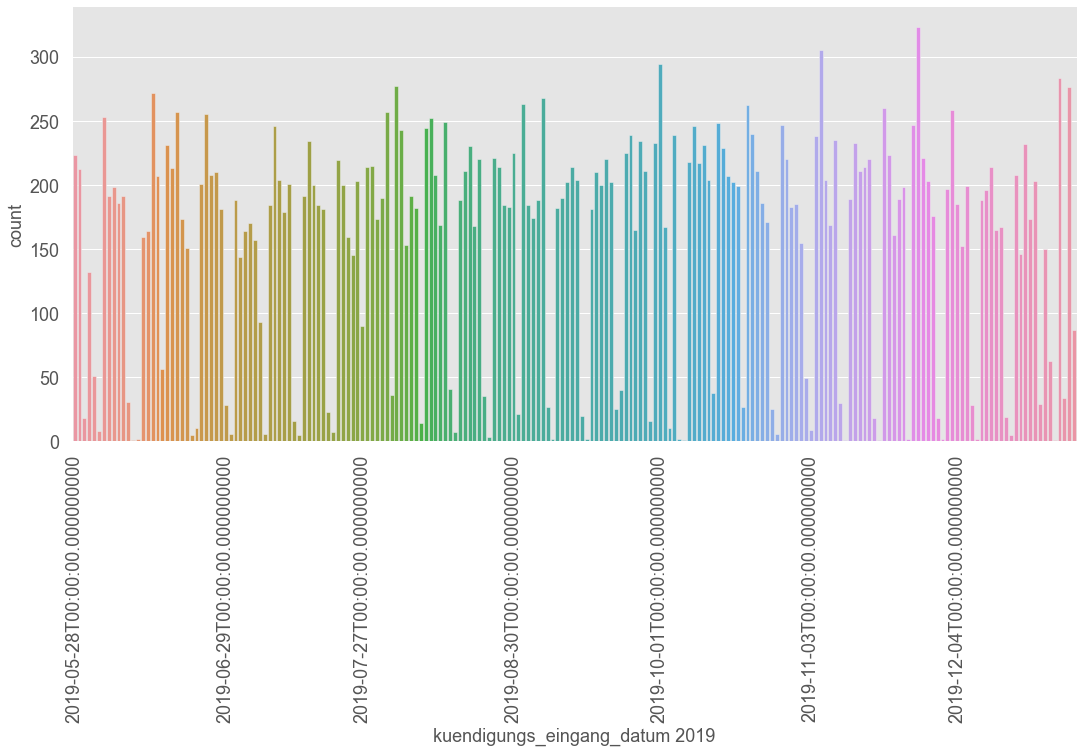

In [128]:
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib.dates import DateFormatter, MonthLocator, YearLocator

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')

fig, ax = plt.subplots(figsize=(18,8))

ax = sns.countplot(kuendigungen_2019['kuendigungs_eingangs_datum']);
plt.xticks(rotation=90);
plt.xlabel('kuendigungs_eingang_datum 2019')

months = MonthLocator()
monthsFmt = DateFormatter("%m-%d")

years = YearLocator()
yearsFmt = DateFormatter("%y")

#ax.xaxis.set_major_formatter(monthsFmt)
#ax.xaxis.set_major_locator(months)

date_form = DateFormatter("%m-%d")
#ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

#ax.set_xlim(pd.datetime.strptime(startDate,'%Y-%m-%d'),pd.datetime.strptime(stopDate,'%Y-%m-%d'))

### Time relation between kuendigungs_eingangs_datum und lieferstart

In [187]:
df_churn = df.query('churn == 1')

In [188]:
df_churn['delivery_to_churn'] = df_churn['kuendigungs_eingangs_datum'] - df_churn['liefer_beginn_evt']

In [189]:
df_churn.head(2)

auftrag_new_id liefer_beginn_evt             kanal  \
1  FDC16301-8457-4FCE-A630-172D027B4FA6 2018-08-29         andere             
2  1B81B3D5-5D6A-4AE7-9AF2-DB5BE537CD90 2018-10-31         Telefonmarketing   

    objekt_name     aboform_name zahlung_rhythmus_name  lesedauer  \
1  ZEIT Digital  Negative Option  halbjährlich          21          
2  DIE ZEIT      Festabo          vierteljährlich       17          

   rechnungsmonat zahlung_weg_name  studentenabo plz_1 plz_2 plz_3  \
1  0               Rechnung         0             4     45    451    
2  0               Bankeinzug       0             4     40    406    

          ort  metropole land_iso_code  shop_kauf  unterbrechung anrede  \
1  Essen       1          DE            0          0              Herr    
2  Düsseldorf  1          DE            2          1              Frau    

        titel  avg_churn  zon_che_opt_in  zon_sit_opt_in  zon_zp_grey  \
1  kein Titel  0.373177   0               0               0             
2  kein Titel  0.472616   0               0               1             

   zon_premium  zon_boa  zon_kommentar  zon_sonstige  zon_zp_red  zon_rawr  \
1  0            0        0              0             1           0          
2  0            0        0              0             0           0          

   zon_community  zon_app_sonstige  zon_schach  zon_blog_kommentare  zon_quiz  \
1  0              0                 0           0                    0          
2  0              0                 0           0                    0          

   cnt_abo  cnt_abo_diezeit  cnt_abo_diezeit_digital  cnt_abo_magazin  \
1  0        0                0                        0                 
2  1        1                0                        0                 

   cnt_umwandlungsstatus2_dkey abo_registrierung_min  nl_zeitbrief  \
1  0                           2018-07-30 03:32:59    2              
2  1                           1986-07-01 12:00:00    0              

   nl_zeitshop  nl_zeitverlag_hamburg  nl_fdz_organisch  nl_blacklist_sum  \
1  0            0                      0                 0                  
2  2            0                      0                 0                  

   nl_bounced_sum  nl_aktivitaet nl_registrierung_min  nl_sperrliste_sum  \
1  0               5             2018-07-29            0                   
2  0               4             2009-12-06            0                   

   nl_opt_in_sum  boa_reg  che_reg  sit_reg  sso_reg  received_anzahl_1w  \
1  0              0        0        0        1        0                    
2  0              0        0        0        1        0                    

   received_anzahl_1m  received_anzahl_3m  received_anzahl_6m  \
1  0                   0                   0                    
2  0                   0                   0                    

   opened_anzahl_1w  opened_anzahl_1m  opened_anzahl_3m  openedanzahl_6m  \
1  0                 0                 0                 0                 
2  0                 0                 0                 0                 

   clicked_anzahl_1w  clicked_anzahl_1m  clicked_anzahl_3m  clicked_anzahl_6m  \
1  0                  0                  0                  0                   
2  0                  0                  0                  0                   

   unsubscribed_anzahl_1w  unsubscribed_anzahl_1m  unsubscribed_anzahl_3m  \
1  0                       0                       0                        
2  0                       0                       0                        

   unsubscribed_anzahl_6m  openrate_1w  clickrate_1w  openrate_1m  \
1  0                       0.0          0.0           0.0           
2  0                       0.0          0.0           0.0           

   clickrate_1m  openrate_3m  clickrate_3m  received_anzahl_bestandskunden_1w  \
1  0.0           0.0          0.0           0                                   
2  0.0           0.0          0.0           0      

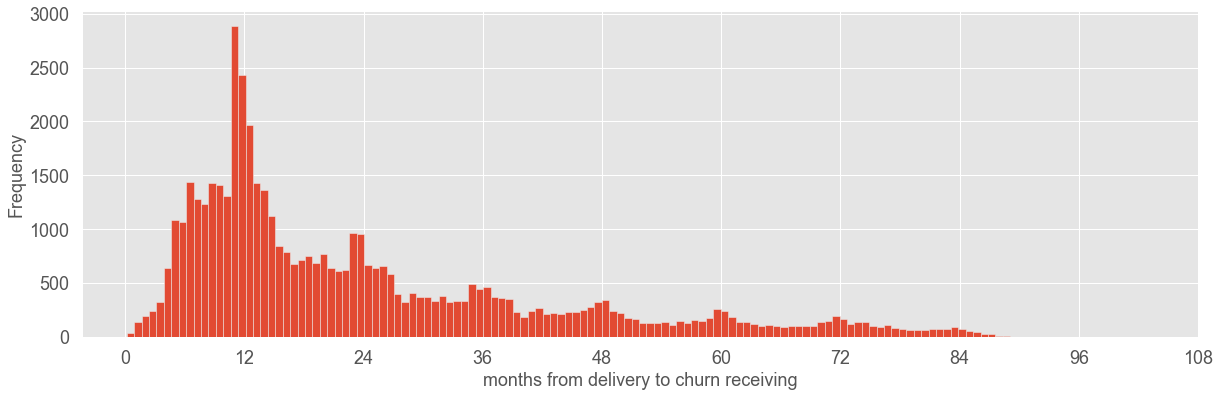

In [190]:
df_churn['delivery_to_churn'].astype('timedelta64[s]').div(2592000).plot.hist(bins=120,figsize=(20,6));
plt.xlabel('months from delivery to churn receiving');
plt.xticks(np.arange(0,120,12));

In [191]:
df_churn['delivery_to_churn'].astype('timedelta64[s]').div(2592000).max()

89.83333333333333

In [192]:
df_churn['delivery_to_churn'] = df_churn['delivery_to_churn'].astype('timedelta64[s]').div(2592000)

In [193]:
df_churn['delivery_to_churn'].head(2)

1    20.7
2    16.8
Name: delivery_to_churn, dtype: float64

In [194]:
months_bins = np.arange(0, 90.5, 0.5)
months_bins

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5,
       33. , 33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. ,
       38.5, 39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5,
       44. , 44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. ,
       49.5, 50. , 50.5, 51. , 51.5, 52. , 52.5, 53. , 53.5, 54. , 54.5,
       55. , 55.5, 56. , 56.5, 57. , 57.5, 58. , 58.5, 59. , 59.5, 60. ,
       60.5, 61. , 61.5, 62. , 62.5, 63. , 63.5, 64. , 64.5, 65. , 65.5,
       66. , 66.5, 67. , 67.5, 68. , 68.5, 69. , 69.5, 70. , 70.5, 71. ,
       71.5, 72. , 72.5, 73. , 73.5, 74. , 74.5, 75

In [195]:
months_bin_series = pd.cut(df_churn['delivery_to_churn'], bins=months_bins, labels=months_bins[:-1])
months_bin_series.name = 'months_bins_2m'
df_churn['months_bins_2m'] = months_bin_series

In [196]:
df_churn.head(2)

auftrag_new_id liefer_beginn_evt             kanal  \
1  FDC16301-8457-4FCE-A630-172D027B4FA6 2018-08-29         andere             
2  1B81B3D5-5D6A-4AE7-9AF2-DB5BE537CD90 2018-10-31         Telefonmarketing   

    objekt_name     aboform_name zahlung_rhythmus_name  lesedauer  \
1  ZEIT Digital  Negative Option  halbjährlich          21          
2  DIE ZEIT      Festabo          vierteljährlich       17          

   rechnungsmonat zahlung_weg_name  studentenabo plz_1 plz_2 plz_3  \
1  0               Rechnung         0             4     45    451    
2  0               Bankeinzug       0             4     40    406    

          ort  metropole land_iso_code  shop_kauf  unterbrechung anrede  \
1  Essen       1          DE            0          0              Herr    
2  Düsseldorf  1          DE            2          1              Frau    

        titel  avg_churn  zon_che_opt_in  zon_sit_opt_in  zon_zp_grey  \
1  kein Titel  0.373177   0               0               0             
2  kein Titel  0.472616   0               0               1             

   zon_premium  zon_boa  zon_kommentar  zon_sonstige  zon_zp_red  zon_rawr  \
1  0            0        0              0             1           0          
2  0            0        0              0             0           0          

   zon_community  zon_app_sonstige  zon_schach  zon_blog_kommentare  zon_quiz  \
1  0              0                 0           0                    0          
2  0              0                 0           0                    0          

   cnt_abo  cnt_abo_diezeit  cnt_abo_diezeit_digital  cnt_abo_magazin  \
1  0        0                0                        0                 
2  1        1                0                        0                 

   cnt_umwandlungsstatus2_dkey abo_registrierung_min  nl_zeitbrief  \
1  0                           2018-07-30 03:32:59    2              
2  1                           1986-07-01 12:00:00    0              

   nl_zeitshop  nl_zeitverlag_hamburg  nl_fdz_organisch  nl_blacklist_sum  \
1  0            0                      0                 0                  
2  2            0                      0                 0                  

   nl_bounced_sum  nl_aktivitaet nl_registrierung_min  nl_sperrliste_sum  \
1  0               5             2018-07-29            0                   
2  0               4             2009-12-06            0                   

   nl_opt_in_sum  boa_reg  che_reg  sit_reg  sso_reg  received_anzahl_1w  \
1  0              0        0        0        1        0                    
2  0              0        0        0        1        0                    

   received_anzahl_1m  received_anzahl_3m  received_anzahl_6m  \
1  0                   0                   0                    
2  0                   0                   0                    

   opened_anzahl_1w  opened_anzahl_1m  opened_anzahl_3m  openedanzahl_6m  \
1  0                 0                 0                 0                 
2  0                 0                 0                 0                 

   clicked_anzahl_1w  clicked_anzahl_1m  clicked_anzahl_3m  clicked_anzahl_6m  \
1  0                  0                  0                  0                   
2  0                  0                  0                  0                   

   unsubscribed_anzahl_1w  unsubscribed_anzahl_1m  unsubscribed_anzahl_3m  \
1  0                       0                       0                        
2  0                       0                       0                        

   unsubscribed_anzahl_6m  openrate_1w  clickrate_1w  openrate_1m  \
1  0                       0.0          0.0           0.0           
2  0                       0.0          0.0           0.0           

   clickrate_1m  openrate_3m  clickrate_3m  received_anzahl_bestandskunden_1w  \
1  0.0           0.0          0.0           0                                   
2  0.0           0.0          0.0           0      

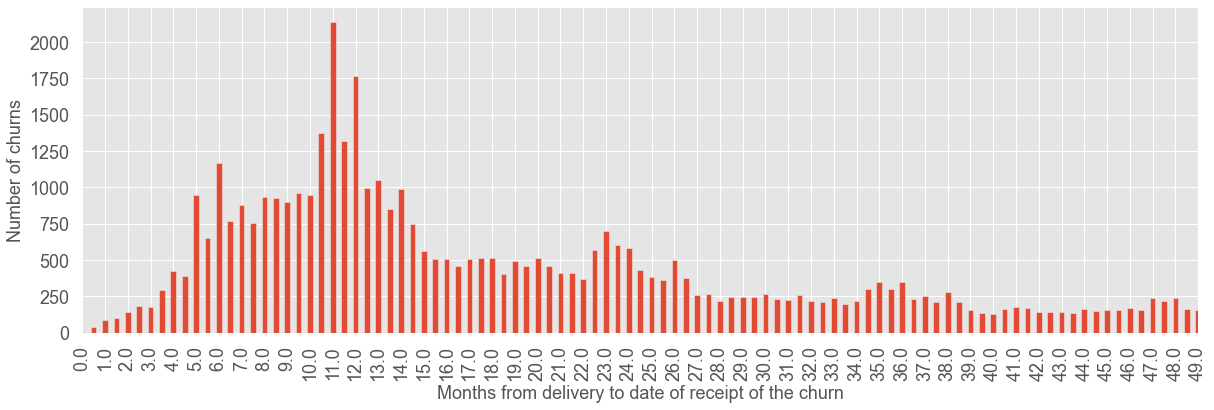

In [197]:
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize=(11,16))
df_churn.groupby('months_bins_2m').count()['churn'].plot(kind='bar',figsize=(20,6))
x_ticks = np.arange(0, 120, 2);
plt.xticks(x_ticks);
plt.xlim(0,98);
plt.ylabel('Number of churns');
plt.xlabel('Months from delivery to date of receipt of the churn');

#ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
#ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))

### Time Relation between kuendigungs_eingangs_datum and nl_registrierung_min

In [198]:
df_churn['nl_start_to_churn'] = df_churn['kuendigungs_eingangs_datum'] - df_churn['nl_registrierung_min']

In [199]:
df_churn.head(2)

auftrag_new_id liefer_beginn_evt             kanal  \
1  FDC16301-8457-4FCE-A630-172D027B4FA6 2018-08-29         andere             
2  1B81B3D5-5D6A-4AE7-9AF2-DB5BE537CD90 2018-10-31         Telefonmarketing   

    objekt_name     aboform_name zahlung_rhythmus_name  lesedauer  \
1  ZEIT Digital  Negative Option  halbjährlich          21          
2  DIE ZEIT      Festabo          vierteljährlich       17          

   rechnungsmonat zahlung_weg_name  studentenabo plz_1 plz_2 plz_3  \
1  0               Rechnung         0             4     45    451    
2  0               Bankeinzug       0             4     40    406    

          ort  metropole land_iso_code  shop_kauf  unterbrechung anrede  \
1  Essen       1          DE            0          0              Herr    
2  Düsseldorf  1          DE            2          1              Frau    

        titel  avg_churn  zon_che_opt_in  zon_sit_opt_in  zon_zp_grey  \
1  kein Titel  0.373177   0               0               0             
2  kein Titel  0.472616   0               0               1             

   zon_premium  zon_boa  zon_kommentar  zon_sonstige  zon_zp_red  zon_rawr  \
1  0            0        0              0             1           0          
2  0            0        0              0             0           0          

   zon_community  zon_app_sonstige  zon_schach  zon_blog_kommentare  zon_quiz  \
1  0              0                 0           0                    0          
2  0              0                 0           0                    0          

   cnt_abo  cnt_abo_diezeit  cnt_abo_diezeit_digital  cnt_abo_magazin  \
1  0        0                0                        0                 
2  1        1                0                        0                 

   cnt_umwandlungsstatus2_dkey abo_registrierung_min  nl_zeitbrief  \
1  0                           2018-07-30 03:32:59    2              
2  1                           1986-07-01 12:00:00    0              

   nl_zeitshop  nl_zeitverlag_hamburg  nl_fdz_organisch  nl_blacklist_sum  \
1  0            0                      0                 0                  
2  2            0                      0                 0                  

   nl_bounced_sum  nl_aktivitaet nl_registrierung_min  nl_sperrliste_sum  \
1  0               5             2018-07-29            0                   
2  0               4             2009-12-06            0                   

   nl_opt_in_sum  boa_reg  che_reg  sit_reg  sso_reg  received_anzahl_1w  \
1  0              0        0        0        1        0                    
2  0              0        0        0        1        0                    

   received_anzahl_1m  received_anzahl_3m  received_anzahl_6m  \
1  0                   0                   0                    
2  0                   0                   0                    

   opened_anzahl_1w  opened_anzahl_1m  opened_anzahl_3m  openedanzahl_6m  \
1  0                 0                 0                 0                 
2  0                 0                 0                 0                 

   clicked_anzahl_1w  clicked_anzahl_1m  clicked_anzahl_3m  clicked_anzahl_6m  \
1  0                  0                  0                  0                   
2  0                  0                  0                  0                   

   unsubscribed_anzahl_1w  unsubscribed_anzahl_1m  unsubscribed_anzahl_3m  \
1  0                       0                       0                        
2  0                       0                       0                        

   unsubscribed_anzahl_6m  openrate_1w  clickrate_1w  openrate_1m  \
1  0                       0.0          0.0           0.0           
2  0                       0.0          0.0           0.0           

   clickrate_1m  openrate_3m  clickrate_3m  received_anzahl_bestandskunden_1w  \
1  0.0           0.0          0.0           0                                   
2  0.0           0.0          0.0           0      

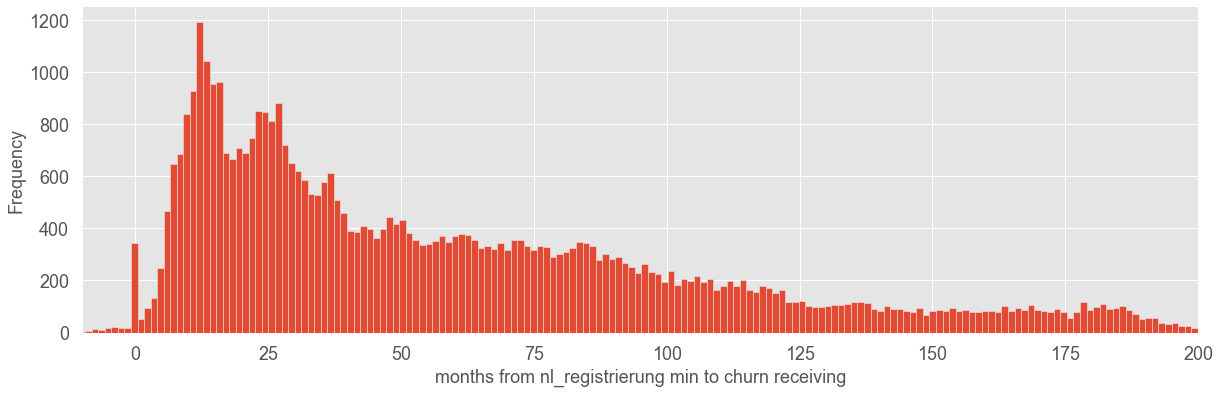

In [205]:
df_churn['nl_start_to_churn'].astype('timedelta64[s]').div(2592000).plot.hist(bins=1200,figsize=(20,6));
plt.xlabel('months from nl_registrierung min to churn receiving');
plt.xlim(-10,200);

In [208]:
df_churn['nl_start_to_churn'] = df_churn['nl_start_to_churn'].astype('timedelta64[s]').div(2592000)

In [210]:
df_churn['nl_start_to_churn'].head(2)

1    21.733333 
2    125.166667
Name: nl_start_to_churn, dtype: float64

In [211]:
months_bins = np.arange(0, 90.5, 0.5)
months_bins

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5,
       33. , 33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. ,
       38.5, 39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5,
       44. , 44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. ,
       49.5, 50. , 50.5, 51. , 51.5, 52. , 52.5, 53. , 53.5, 54. , 54.5,
       55. , 55.5, 56. , 56.5, 57. , 57.5, 58. , 58.5, 59. , 59.5, 60. ,
       60.5, 61. , 61.5, 62. , 62.5, 63. , 63.5, 64. , 64.5, 65. , 65.5,
       66. , 66.5, 67. , 67.5, 68. , 68.5, 69. , 69.5, 70. , 70.5, 71. ,
       71.5, 72. , 72.5, 73. , 73.5, 74. , 74.5, 75

In [212]:
nl_min_bins_series = pd.cut(df_churn['nl_start_to_churn'], bins=months_bins, labels=months_bins[:-1])
nl_min_bins_series.name = 'nl_min_bins_05m'
df_churn['nl_start_to_churn_bins_05m'] = nl_min_bins_series

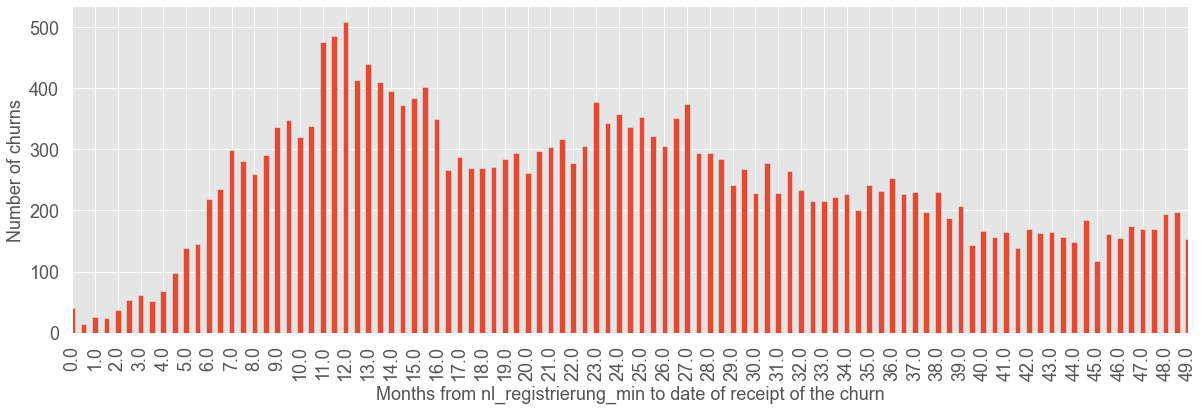

In [213]:
fig, ax = plt.subplots(figsize=(11,16))
df_churn.groupby('nl_start_to_churn_bins_05m').count()['churn'].plot(kind='bar',figsize=(20,6))
x_ticks = np.arange(0, 120, 2);
plt.xticks(x_ticks);
plt.xlim(0,98);
plt.ylabel('Number of churns');
plt.xlabel('Months from nl_registrierung_min to date of receipt of the churn');

## Activity features

These features were we can see interactions and communicate with the customers.

- newsletter
- clickrates
- openrates
- community

In [ ]:
index=0
for elem in df.columns:
    index+=1
    print(f"{index} {elem}")

In [ ]:
df_zon = df.iloc[::, 21:35]                # zones are special areas that need registration
df_cnt = df.iloc[::, 35:40]                # cnt is the number of subscribtions the contract holds (families, libaries etc.)
df_nl = df.iloc[::, 41:51]                 # newsletter
df_nl_interact = df.iloc[::, 55:77]        # newsletter interactions
df_nl_bestandskunden = df.iloc[::, 77:99]  # newsletter existing customers
df_nl_produktnews = df.iloc[::, 99:121]    # productnews (kind of newsletter but more commercial)
df_nl_hamburg = df.iloc[::, 121:143]       # newsletter region hamburg
df_zb = df.iloc[::, 143:165]               # zb = zeitbrief kind of letter

In [ ]:
df_list = [df, df_zon, df_cnt, df_nl, df_nl_interact, df_nl_bestandskunden, df_nl_produktnews, df_nl_hamburg, df_zb]

#for elem in df_list:
#    eda.correlogram(elem)

## Target Variable Analysis - churn

Our target variable is "churn", which is 1 - churn or 0 - no churn. 

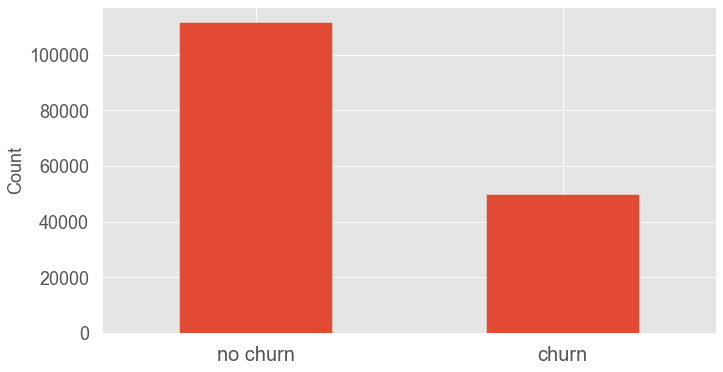

In [228]:
## Show the imbalance of churn target
df.churn.value_counts().plot(kind='bar',figsize=(11,6));
plt.ylabel('Count');
#plt.xlabel('Churn')
plt.xticks(np.arange(2), ('no churn', 'churn'),fontsize=20,rotation=0);

## Feature Analysis

## Observation of histograms for distribution characteristics

## Correlogram for continuous variables - Heatmap

## Overal Skew and Kurtosis of the data

## Final Feature Selection List and Dropping of Features

## Statistical distribution of our target default

## Export the dataframe to .csv file

## Conclusion

# Feature Engineering

# Predictive Modelling

## Structure of the notebooks for machine learning

We used different jupyter notebook for different methods of machine learning. These notebooks are linked here:
    
- ...

- ...

- ...

- ...

# Data Visualization

The results and our main finding can be found in our presentation:

# Future Work

The aspects of future work can be found in our presentation. 